In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./datasetes/credit/creditcard.csv", low_memory=False)
# df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1, random_state=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
1,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
2,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
3,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
4,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0


In [3]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


In [4]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [455]:
X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=500)
# trainpd = pd.read_csv("./datasetes/credit/credit_train3.csv")
# X_train = trainpd.iloc[:, :-1]
# y_train = trainpd.iloc[:, -1]
# testpd = pd.read_csv("./datasetes/credit/credit_test3.csv")
# X_test = testpd.iloc[:, :-1]
# y_test = testpd.iloc[:, -1]

print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[y_test == 1]), len(y_test.loc[y_test == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[y_train == 1]), len(y_train.loc[y_train == 1])/len(y_train))

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 182 0.0018257877471584924
Number of frauds on y_train: 310 0.0016745532724012013


In [393]:
X_train[0], y_train[0]

(array([  4.05680000e+04,   1.07986004e+00,   3.74335739e-02,
          4.05189660e-01,   1.11623980e+00,  -3.52652667e-01,
         -4.05465558e-01,   1.48082619e-02,   1.37820957e-03,
          2.03991389e-01,  -5.03189566e-02,  -2.98616675e-01,
         -1.76794270e-01,  -8.90378215e-01,   5.41904085e-01,
          1.40271242e+00,  -4.02862035e-02,  -1.52854308e-01,
         -4.93987693e-01,  -7.41539707e-01,  -1.17354908e-01,
         -2.28408518e-02,  -1.78534699e-01,  -8.77119112e-03,
          4.11553535e-02,   3.84051242e-01,  -4.37645941e-01,
          2.44553934e-02,   3.11215578e-02,   5.93500000e+01]), 0)

In [394]:
X_test[0], y_test[0]

(array([  1.52093000e+05,   7.44982141e-03,   1.13163011e+00,
         -2.66036367e+00,  -6.75345504e-01,   1.81505622e+00,
         -5.32755745e-01,   1.19830550e+00,   4.38943170e-02,
         -5.81932719e-01,  -7.11666890e-02,  -5.36796316e-01,
          1.16766819e-01,  -7.22340099e-01,   1.37877058e+00,
         -1.05032091e+00,  -6.54230796e-01,  -5.43860498e-01,
          5.89924506e-01,   9.33565770e-01,  -4.09520114e-01,
          5.82155900e-01,   1.66838208e+00,  -5.99436990e-02,
         -2.95606238e-01,  -1.03082614e+00,  -1.61548812e-01,
         -6.69506565e-02,   2.40108311e-01,   1.00000000e+00]), 0)

In [50]:
(99683-176)/176

565.3806818181819

In [497]:
import EnhancedForest
import EnhancedForest_0322
import EnhancedDTree
import time
import datetime
import importlib
import numpy as np
importlib.reload(EnhancedForest)
importlib.reload(EnhancedForest_0322)
importlib.reload(EnhancedDTree)

<module 'EnhancedDTree' from 'C:\\github_workspace\\ecoForest\\EnhancedDTree.py'>

In [498]:
from sklearn import metrics
def acc_metrix_mult(a, p):
#     print(p)
    return "acc", metrics.accuracy_score(a, p)
def roc_metrix_mult(a, p, labels=[0,1]):
# #     print(p)
    if len(set(a)) == 1:
#         return "acc", metrics.accuracy_score(a, p)
        return "mean", np.mean(p), set(a)
#         return "acc", len(a) - len(np.where(a == p)[0])
#     if type(p) == np.float64 or type(p) == float or type(p) == np.int64 or type(p) == int:
    if len(p.shape) == 1:
#         print(type(p), p.shape)
        return "roc", metrics.roc_auc_score(a, p)
#     elif len(p[0]) == 2:
    elif len(p.shape) == 2:
        p = [i[1] for i in p]
        return "roc", metrics.roc_auc_score(a, p)
    else:
        print(type(p), p.shape, "error")
def confusion_matrix_mult(a, p):
    if len(set(a)) == 1:
        return len(a), len(a) - len(np.where(a == p)[0])
    return metrics.confusion_matrix(a, p)

In [499]:
%%time
### stackplot
pass_data_len = []
pass_data_pos_len = []
### stackplot

# 统计信息
train_loss_lt = []
pass_train_loss_lt = []
pass_train_loss_lt_now = []
vaild_loss_lt = []
pass_vaild_loss_lt = []
pass_vaild_loss_lt_now = []
test_loss_lt = []
pass_test_loss_lt = []
pass_test_loss_lt_now = []
pass_data_rate_lt = []
pass_data_rate_train_lt = []

# 数据
X = X_train.copy()
y = y_train.copy()

X_test = X_test.copy()
test_y = np.array(([0.0] * len(X_test)))
all_pass_data_mask = np.array([False] * len(X_test))
# data_mask = np.array([False] * len(X_test))
real_y = y_test.copy()

# 不均衡数据进行layer
X_train_np = X
y_train_np = y
maxlayer = 100
maxlayer = 10
layer = 0

# 不降低不更新
last_train_loss = 0
last_vaild_loss = 0

# enhancedDTree = EnhancedForest_0322.EnhancedForest(len(X_train), len(X_test), isLRStacker=True)
enhancedDTree = EnhancedForest.EnhancedForest(len(X_train), len(X_test), isLRStacker=True)
counter = 0
early_stop = 0
early_stop_up = 0
tmp_test_loss = 0

ts = time.time()
tm = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S.%f')
print(tm)
    
while 1:
    layer += 1
    print()
    print("layer:", layer)
    X = X_train_np
    y = y_train_np
    if layer == 1: isFirst = True
    else: isFirst = False
        
    clf, now_pass_data_mask, p_test = \
        enhancedDTree.TrainModelLayer(X, y, X_test, all_pass_data_mask, test_y, real_y, verbose=False, \
                                      feval=roc_metrix_mult, dropout=0.99, criterion='gini', random_state=layer, \
                                      isFirst=isFirst, min_samples_leaf=1\
                                     )
    feval=roc_metrix_mult
    train_loss = enhancedDTree.getTrainLoss(feval)
    pass_train_loss = enhancedDTree.getPassTrainLoss(feval)
    pass_train_loss_now = enhancedDTree.getPassTrainLossNow(feval)
    vaild_loss = enhancedDTree.getVaildLoss(feval)
    pass_vaild_loss = enhancedDTree.getPassVaildLoss(feval)
    pass_vaild_loss_now = enhancedDTree.getPassVaildLossNow(feval)
    test_loss = enhancedDTree.getTestLoss(feval)
    pass_test_loss = enhancedDTree.getPassTestLoss(feval)
    pass_test_loss_now = enhancedDTree.getPassTestLossNow(feval)
    
#     if train_loss[1] < last_train_loss and vaild_loss[1] < last_vaild_loss: 
# #     if vaild_loss[1] < last_vaild_loss: 
#         if not isFirst: enhancedDTree.remove_last_items()
# #         early_stop_up += 1
#         if layer > maxlayer or early_stop > 5 or early_stop_up > 15:
#             break
#         continue
        
    last_train_loss = train_loss[1]
    last_vaild_loss = vaild_loss[1]
    
    
    # 打印信息
#     all_false_data_index = np.where(all_pass_data_mask == False)[0]
#     X_test_np = X_test[all_np_data_index]
    
    X_train_np = enhancedDTree.X_train_np
    y_train_np = enhancedDTree.y_train_np
    X_train_pass_lt = enhancedDTree.pass_data_x_list
    y_train_pass_lt = enhancedDTree.pass_data_y_list
    y_train_pass_all = np.array([i for j in y_train_pass_lt for i in j])
    if layer != 1:
        print("%d [train - now p:%d/1:%d | all p:%d/1:%d | np:%d/1:%d] " % (layer,  
                                    len(y_train_pass_lt[-1]), len(np.where(y_train_pass_lt[-1] == 1)[0]), 
                                    len(y_train_pass_all), len(np.where(y_train_pass_all == 1)[0]), 
                                    len(y_train_np), len(np.where(y_train_np == 1)[0]) ))
    
    now_pass_test_data_id = np.where(now_pass_data_mask==True)[0]
    now_np_test_data_id = np.where(now_pass_data_mask==False)[0]
    last_pass_test_data_id = np.where(all_pass_data_mask==True)[0]
    all_pass_test_data_id = np.hstack((now_pass_test_data_id, last_pass_test_data_id))
    now_test_y = real_y[~all_pass_data_mask]
    print("%d [test - now p:%d/1:%d | all p:%d/1:%d | np:%d/1:%d] " % (layer,  
                                    len(now_pass_test_data_id), len(np.where(now_test_y[now_pass_test_data_id] == 1)[0]), 
                                    len(all_pass_test_data_id), len(np.where(real_y[all_pass_test_data_id] == 1)[0]), 
                                    len(now_np_test_data_id), len(np.where(now_test_y[now_np_test_data_id] == 1)[0]) ))
    
    print(all_pass_test_data_id.shape, now_np_test_data_id.shape, all_pass_test_data_id.shape[0] + now_np_test_data_id.shape[0])
#     print(np.where(now_test_y[now_np_test_data_id] == 1)[0], len(np.where(now_test_y[now_np_test_data_id] == 1)[0]))

    #len(pass_data_id),
#                                       len(np.where(real_y[data_mask] == 1)[0]), \
#                                       len(X_test_np) - len(pass_data_id), \
#                                       len(np.where(real_y[np_data_id] == 1)[0])   ))#, end="")
    ### stackplot
#     pass_data_len.append(len(pass_data_id))
#     pass_data_pos_len.append(len(np.where(y_train_np == 1)[0]))
    ### stackplot
    if len(now_pass_test_data_id) == 0: early_stop += 1
        
    print("train loss", train_loss)
    print("pass train loss", pass_train_loss)
    print("pass train loss now", pass_train_loss_now)
    print("vaild loss", vaild_loss)
    print("pass vaild loss", pass_vaild_loss)
    print("pass vaild loss now", pass_vaild_loss_now)
    print("test loss", test_loss)
    print("pass test loss", pass_test_loss)
    print("pass test loss now", pass_test_loss_now)
    
    ts = time.time()
    tm = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S.%f')
    print(tm)
    
    
#     tmp_all_data_mask = all_false_data_index[~now_pass_data_mask]
#     test_y[tmp_all_data_mask] = p_test[~now_pass_data_mask]
    tmp =  metrics.roc_auc_score(y_test, test_y)
    if tmp_test_loss < tmp:
        tmp_test_loss = tmp
#     tmp_test_loss = metrics.accuracy_score(y_sub, test_y)
        best_test_y = test_y.copy()
    print("best test loss:", tmp_test_loss)
    
    train_loss_lt.append(train_loss[1])
    pass_train_loss_lt.append(pass_train_loss[1])
    pass_train_loss_lt_now.append(pass_train_loss_now[1])
    vaild_loss_lt.append(vaild_loss[1])
    pass_vaild_loss_lt.append(pass_vaild_loss[1])
    pass_vaild_loss_lt_now.append(pass_vaild_loss_now[1])
    test_loss_lt.append(test_loss[1])
    pass_test_loss_lt.append(pass_test_loss[1])
    pass_test_loss_lt_now.append(pass_test_loss_now[1])
    
    
#     if len(pass_data_rate_lt) == 0:
#         pass_data_rate_lt.append(len(now_pass_data_mask[now_pass_data_mask==True])/len(X_test))
#         pass_data_rate_train_lt.append(0)
#     else:
#         pass_data_rate_lt.append(pass_data_rate_lt[-1]+len(now_pass_data_mask[now_pass_data_mask==True])/len(X_test))
#         pass_data_rate_train_lt.append(pass_data_rate_train_lt[-1]+len(enhancedDTree.pass_data_y_list[-1])/len(X_train))
    # 打印信息结束
    
#     if X_train_np.shape[0] < 10 or layer > maxlayer or y_train_np[y_train_np==1].shape[0] <= 10 or early_stop > 5:
#     if layer > maxlayer or early_stop > 5:
#         break
        
    all_pass_data_mask[~all_pass_data_mask] = now_pass_data_mask
    
    if layer == 2: break
#     if layer == 20: break

2018-03-24 15:54:56.864408

layer: 1
start train: 2018-03-24 15:54:56.864408
[train - p:0/1:0|n:185124/1:310] 
start test: 2018-03-24 15:55:56.673370
end test: 2018-03-24 15:55:56.996227
test loss: y_true 99683 99683, y_pred:99683 99683
1 [test - now p:0/1:0 | all p:0/1:0 | np:99683/1:182] 
(0,) (99683,) 99683
train loss ('roc', 0.99759812568311923)
pass train loss (0, 0)
pass train loss now (0, 0)
vaild loss ('roc', 0.99759983620847048)
pass vaild loss (0, 0)
pass vaild loss now (0, 0)
test loss ('roc', 0.97294924751432732)
pass test loss (0, 0)
pass test loss now (0, 0)
2018-03-24 15:55:57.136599
best test loss: 0.972949247514

layer: 2
start train: 2018-03-24 15:55:57.154647
[train - p:181572/1:73|n:3552/1:237] start test: 2018-03-24 15:57:00.787854
end test: 2018-03-24 15:57:03.771780
test loss: y_true 1948 99683, y_pred:1948 99683
2 [train - now p:181572/1:73 | all p:181572/1:73 | np:3552/1:237] 
2 [test - now p:97735/1:48 | all p:97735/1:48 | np:1948/1:134] 
(97735,) (1948,) 9968

In [503]:
enhancedDTree.p_all.shape

(185124,)

In [504]:
enhancedDTree.p_all_fold.shape

(185124,)

In [505]:
metrics.roc_auc_score(y_test, test_y)

0.97349794706353932

In [500]:
X_train_np = enhancedDTree.X_train_np.copy()
y_train_np = enhancedDTree.y_train_np.copy()
X_train_pass_lt = enhancedDTree.pass_data_x_list.copy()
y_train_pass_lt = enhancedDTree.pass_data_y_list.copy()
X_train_pass = np.array([j for i in np.array(X_train_pass_lt) for j in i])
y_train_pass = np.array([j for i in np.array(y_train_pass_lt) for j in i])

enhancedDTree.p_all

X_train_np.shape, y_train_np.shape, X_train_pass.shape, y_train_pass.shape

((3552, 30), (3552,), (181572, 30), (181572,))

In [508]:
X_test_np = X_test[~all_pass_data_mask].copy()
y_test_np = real_y[~all_pass_data_mask].copy()
X_test_pass = X_test[all_pass_data_mask].copy()
y_test_pass = real_y[all_pass_data_mask].copy()
y_test_pass_pred = test_y[all_pass_data_mask].copy()
y_test_np_pred = test_y[~all_pass_data_mask].copy()

X_test_pass.shape, y_test_pass.shape, X_test_np.shape, y_test_np.shape, y_test_pass_pred.shape, y_test_np_pred.shape

((97735, 30), (97735,), (1948, 30), (1948,), (97735,), (1948,))

In [512]:
print("pass auc:", metrics.roc_auc_score(y_test_pass, y_test_pass_pred))
print("np auc:", metrics.roc_auc_score(y_test_np, y_test_np_pred))
print("all auc:", metrics.roc_auc_score(np.hstack((y_test_np, y_test_pass)), np.hstack((y_test_np_pred, y_test_pass_pred))))

pass auc: 0.906219929469
np auc: 0.980302456845
all auc: 0.973497947064


In [648]:
import ModelUtils
import importlib
from collections import Counter
importlib.reload(ModelUtils)

<module 'ModelUtils' from 'C:\\github_workspace\\ecoForest\\ModelUtils.py'>

In [571]:
%%time
clf, pred_y = ModelUtils.mlp_classifier(X_train_np, y_train_np, X_test_np, y_test_np, feval=roc_metrix_mult)
pred_y = np.array([i[1] for i in pred_y])
print(clf, pred_y.shape)
print("all auc:", metrics.roc_auc_score(np.hstack((y_test_np, y_test_pass)), np.hstack((pred_y, y_test_pass_pred))))

train ('roc', 0.55517243573833297)
test ('roc', 0.55108073195214669)
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False) (1948,)
all auc: 0.959817456139
Wall time: 71.2 ms


In [647]:
%%time
clf, pred_y = ModelUtils.decision_tree(X_train_np, y_train_np, X_test_np, y_test_np, feval=roc_metrix_mult)
pred_y = np.array([i[1] for i in pred_y])
print(clf, pred_y.shape)
print("all auc:", metrics.roc_auc_score(np.hstack((y_test_np, y_test_pass)), np.hstack((pred_y, y_test_pass_pred))))
# pass auc: 0.906219929469
# np auc: 0.90923826293
# all auc: 0.861099109833
# raw all auc: 0.973497947064

train ('roc', 1.0)
test ('roc', 0.91116770063683783)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') (1948,)
all auc: 0.86114356242
Wall time: 125 ms


In [552]:
%%time
clf, pred_y = ModelUtils.random_forest(X_train_np, y_train_np, X_test_np, y_test_np, feval=roc_metrix_mult)
pred_y = np.array([i[1] for i in pred_y])
print(clf, pred_y.shape)

# pass auc: 0.906219929469
# np auc: 0.993767381395
# all auc: 0.974001586598
# raw all auc: 0.973497947064

start train: 2018-03-24 16:22:10.864703
start test: 2018-03-24 16:22:11.463306
end test: 2018-03-24 16:22:11.566588
test ('roc', 0.99413763596570626)
train ('roc', 1.0)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) (1948,)
Wall time: 922 ms


In [653]:
%%time
clf, pred_y = ModelUtils.gdbt_model(X_train_np, y_train_np, X_test_np, y_test_np, feval=roc_metrix_mult)
pred_y = np.array([i[1] for i in pred_y])
print(clf, pred_y.shape)
print("all auc:", metrics.roc_auc_score(np.hstack((y_test_np, y_test_pass)), np.hstack((pred_y, y_test_pass_pred))))

# pass auc: 0.906219929469
# np auc: 0.991953133999
# all auc: 0.973785094214
# raw all auc: 0.973497947064

train ('roc', 1.0)
test ('roc', 0.99166927216179301)
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False) (1948,)
all auc: 0.973781283992
Wall time: 1.51 s


In [658]:
train_np = pd.DataFrame(X_train_np)
train_np['y'] = y_train_np
train_np.to_csv("./output/train.np.csv", index=False)
train_np.shape

(3552, 31)

In [659]:
train_np = pd.DataFrame(X_test_np)
train_np['y'] = y_test_np
train_np.to_csv("./output/test.np.csv", index=False)
train_np.shape

(1948, 31)

In [662]:
import pickle
with open(r"./output/layer_1-test.pkl", "rb") as input_file:
    e = pickle.load(input_file)
print(e)

{'X': array([[  1.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
          1.83962494e-01,   1.52030399e-01,   2.69000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   9.90000010e-01, ...,
         -1.42641145e-01,  -1.39459872e-01,   6.50000000e+01],
       [  1.00000000e+00,   0.00000000e+00,   9.90000010e-01, ...,
         -4.55486608e-02,  -8.73240204e-02,   1.54800000e+02],
       ..., 
       [  9.90000010e-01,   0.00000000e+00,   1.00000000e+00, ...,
         -1.54527041e-01,   1.55418301e-03,   3.99900000e+01],
       [  9.90000010e-01,   0.00000000e+00,   1.00000000e+00, ...,
          3.64368385e-03,   7.24227450e-02,   1.15000000e+01],
       [  9.90000010e-01,   0.00000000e+00,   1.00000000e+00, ...,
         -7.25914532e-02,  -4.01702288e-02,   2.10820000e+02]]), 'y': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}


In [666]:
e['y'].shape
# print("all auc:", metrics.roc_auc_score(np.hstack((y_test_np, y_test_pass)), np.hstack((e['y'], y_test_pass_pred))))

(99683,)

In [676]:
pred_y = [0.017373275011777878, 0.5296658873558044, 0.006504380609840155, 0.018391979858279228, 0.035247836261987686, 0.022969642654061317, 0.014645211398601532, 0.057818979024887085, 0.0006876034894958138, 0.012000015936791897, 0.08391909301280975, 0.013830987736582756, 0.016791561618447304, 0.008420171216130257, 0.005016902461647987, 0.029426421970129013, 0.018485961481928825, 0.006502320058643818, 0.788286566734314, 0.03666052967309952, 0.021527007222175598, 0.005592777859419584, 0.0019865124486386776, 0.016422029584646225, 0.047405920922756195, 0.014981021173298359, 0.021692391484975815, 0.7968577146530151, 0.0026456774212419987, 0.7863301038742065, 0.5103703737258911, 0.015420911833643913, 0.0066864811815321445, 0.018325163051486015, 0.0034751351922750473, 0.011742091737687588, 0.002824952360242605, 0.0073191821575164795, 0.01465154904872179, 0.06086357682943344, 0.011609537526965141, 0.029849817976355553, 0.01921244151890278, 0.05051035434007645, 0.003903837176039815, 0.057366084307432175, 0.7505898475646973, 0.0094886664301157, 0.019126374274492264, 0.029874077066779137, 0.0028636816423386335, 0.7427888512611389, 0.014663000591099262, 0.03257666900753975, 0.0018982257461175323, 0.019691865891218185, 0.018431970849633217, 0.005010942928493023, 0.015826808288693428, 0.04055057093501091, 0.007859080098569393, 0.01775446906685829, 0.026746314018964767, 0.019608506932854652, 0.6268575191497803, 0.05542009323835373, 0.008031964302062988, 0.06285841017961502, 0.023305321112275124, 0.005316756200045347, 0.24636586010456085, 0.006915017031133175, 0.009762397035956383, 0.01698221266269684, 0.004414455033838749, 0.0032214645761996508, 0.020980076864361763, 0.021970409899950027, 0.002997844945639372, 0.79892897605896, 0.015864070504903793, 0.008422939106822014, 0.022516585886478424, 0.014257745817303658, 0.014272339642047882, 0.010181247256696224, 0.014711184427142143, 0.06699393689632416, 0.03615623340010643, 0.02134370617568493, 0.008949466049671173, 0.007909637875854969, 0.014343975111842155, 0.008900961838662624, 0.021433796733617783, 0.03547007963061333, 0.052807122468948364, 0.010244157165288925, 0.038035281002521515, 0.042865388095378876, 0.0013257572427392006, 0.0027996215503662825, 0.033057279884815216, 0.023968001827597618, 0.017332475632429123, 0.006874344311654568, 0.010994470678269863, 0.02262548729777336, 0.0265668872743845, 0.031887371093034744, 0.011631272733211517, 0.019217099994421005, 0.02369007095694542, 0.007221376057714224, 0.06030086427927017, 0.013853433541953564, 0.02537407912313938, 0.0122151467949152, 0.6683274507522583, 0.009311958216130733, 0.0021851607598364353, 0.011287831701338291, 0.00499003054574132, 0.010761205106973648, 0.0015659003984183073, 0.015291878953576088, 0.019551027566194534, 0.03672057390213013, 0.5509480834007263, 0.012051362544298172, 0.0078772297129035, 0.019699668511748314, 0.01891331933438778, 0.0005452922778204083, 0.02054789662361145, 0.027418961748480797, 0.00574143324047327, 0.014528719708323479, 0.014382034540176392, 0.04234138876199722, 0.5602814555168152, 0.020304884761571884, 0.013857625424861908, 0.7897108793258667, 0.008237125352025032, 0.02570701204240322, 0.014574013650417328, 0.011380244046449661, 0.010771208442747593, 0.005901156924664974, 0.21766841411590576, 0.009943797253072262, 0.01318387221544981, 0.006103109568357468, 0.0037484567146748304, 0.003523288294672966, 0.011656878516077995, 0.005491368006914854, 0.02138931304216385, 0.03672090917825699, 0.012793958187103271, 0.7257700562477112, 0.00433474313467741, 0.018132157623767853, 0.0026595820672810078, 0.06859704107046127, 0.006517372094094753, 0.006526739802211523, 0.016409125179052353, 0.03626822680234909, 0.01199362799525261, 0.004284619819372892, 0.006876923143863678, 0.001672145677730441, 0.03264761343598366, 0.7221039533615112, 0.013787914998829365, 0.007360903080552816, 0.018354974687099457, 0.04047094285488129, 0.014414471574127674, 0.005720330402255058, 0.013314327225089073, 0.0036658074241131544, 0.3396499454975128, 0.01333356648683548, 0.031255125999450684, 0.04530109465122223, 0.07795090228319168, 0.057240139693021774, 0.015762757509946823, 0.0038520428352057934, 0.0036331000737845898, 0.005908840801566839, 0.006792108528316021, 0.024961106479167938, 0.004200306721031666, 0.013584403321146965, 0.7427888512611389, 0.024722248315811157, 0.08254598081111908, 0.06305475533008575, 0.00675192940980196, 0.023009708151221275, 0.0029392321594059467, 0.052833426743745804, 0.012415889650583267, 0.009211631491780281, 0.011640009470283985, 0.019026463851332664, 0.039073411375284195, 0.006755986250936985, 0.01765204593539238, 0.0037479388993233442, 0.03642241656780243, 0.015909958630800247, 0.012600083835422993, 0.04567399248480797, 0.007796233054250479, 0.007419233676046133, 0.00994357280433178, 0.002552430611103773, 0.009484672918915749, 0.019553901627659798, 0.012485139071941376, 0.029160847887396812, 0.029235947877168655, 0.00985616073012352, 0.004875434562563896, 0.008445685729384422, 0.010202103294432163, 0.021368972957134247, 0.044330839067697525, 0.020006919279694557, 0.029070502147078514, 0.01361512579023838, 0.0010789614170789719, 0.029449906200170517, 0.027078663930296898, 0.017541542649269104, 0.03387894481420517, 0.014202450402081013, 0.021371902897953987, 0.022531989961862564, 0.007878140546381474, 0.01686924509704113, 0.011233515106141567, 0.009899922646582127, 0.007665822748094797, 0.006179171614348888, 0.47909021377563477, 0.7991488575935364, 0.0114738829433918, 0.0005516826640814543, 0.005440885666757822, 0.01589060202240944, 0.012965510599315166, 0.017403636127710342, 0.004071710631251335, 0.01718323305249214, 0.009133590385317802, 0.0021489711944013834, 0.009572884067893028, 0.021766452118754387, 0.01219774130731821, 0.016356967389583588, 0.7732225656509399, 0.01618056371808052, 0.051213979721069336, 0.0032128836028277874, 0.011234534904360771, 0.008916430175304413, 0.0059528774581849575, 0.7988245487213135, 0.011302550323307514, 0.02504071220755577, 0.0010839613387361169, 0.7931621670722961, 0.7211266160011292, 0.02643592655658722, 0.03356663137674332, 0.04118141159415245, 0.005996447987854481, 0.003836885094642639, 0.020317915827035904, 0.011039230041205883, 0.08708856254816055, 0.07708508521318436, 0.04345439374446869, 0.4639764726161957, 0.3888685405254364, 0.009514862671494484, 0.1302444487810135, 0.004460679832845926, 0.0049877651035785675, 0.011850165203213692, 0.03129049018025398, 0.026232104748487473, 0.005829543806612492, 0.5800355672836304, 0.00801447406411171, 0.026706844568252563, 0.07996918261051178, 0.007582538761198521, 0.02219667099416256, 0.01503010280430317, 0.01540770661085844, 0.014843383803963661, 0.0032690491061657667, 0.011463915929198265, 0.0058307889848947525, 0.755370020866394, 0.012406108900904655, 0.05819474533200264, 0.021205581724643707, 0.021838953718543053, 0.011301328428089619, 0.01852543093264103, 0.011606586165726185, 0.014552523382008076, 0.03339875116944313, 0.0052100783213973045, 0.041973866522312164, 0.013792477548122406, 0.01905975677073002, 0.014909252524375916, 0.03449065238237381, 0.012742611579596996, 0.011398402974009514, 0.020449664443731308, 0.007152874022722244, 0.010233627632260323, 0.004633999429643154, 0.011565073393285275, 0.017124321311712265, 0.025070831179618835, 0.011884624138474464, 0.018051717430353165, 0.009856832213699818, 0.004314964171499014, 0.00563643965870142, 0.005024842917919159, 0.019214361906051636, 0.04831831529736519, 0.010944249108433723, 0.013504577800631523, 0.07275697588920593, 0.024218101054430008, 0.0172610841691494, 0.037753067910671234, 0.07866612821817398, 0.004549759440124035, 0.0033846187870949507, 0.004291242454200983, 0.018226955085992813, 0.7985831499099731, 0.011482560075819492, 0.049827564507722855, 0.006320702377706766, 0.0433957576751709, 0.02837066911160946, 0.025925669819116592, 0.010630648583173752, 0.009220225736498833, 0.018761353567242622, 0.015940673649311066, 0.7974642515182495, 0.2664913535118103, 0.01020713523030281, 0.00416598143056035, 0.035607144236564636, 0.0006096134893596172, 0.012468380853533745, 0.021548017859458923, 0.008259768597781658, 0.7957059144973755, 0.00442615058273077, 0.0031932364217936993, 0.0345124825835228, 0.005471201613545418, 0.01326869148761034, 0.03988537937402725, 0.0014019440859556198, 0.013067388907074928, 0.01002578902989626, 0.00424384418874979, 0.003177922684699297, 0.009832648560404778, 0.1247418150305748, 0.009887478314340115, 0.011826416477560997, 0.024484165012836456, 0.7641804814338684, 0.01600443199276924, 0.03554058447480202, 0.014965209178626537, 0.005988942459225655, 0.7989263534545898, 0.009426278993487358, 0.003858376992866397, 0.010225851088762283, 0.004922335036098957, 0.004522680304944515, 0.015940386801958084, 0.019008208066225052, 0.005268228240311146, 0.0419112853705883, 0.03694049268960953, 0.004037960432469845, 0.009614480659365654, 0.015232725068926811, 0.013144969940185547, 0.006494271568953991, 0.009866632521152496, 0.003345006611198187, 0.7988566160202026, 0.07007159292697906, 0.007097143679857254, 0.018077362328767776, 0.0050402614288032055, 0.05393493175506592, 0.01159440353512764, 0.040998801589012146, 0.026998326182365417, 0.007378729991614819, 0.014425856061279774, 0.001139722648076713, 0.04764977842569351, 0.006399013102054596, 0.004476641770452261, 0.060739584267139435, 0.014261556789278984, 0.014277671463787556, 0.03303374722599983, 0.0009871716611087322, 0.01828600838780403, 0.008589264936745167, 0.022488215938210487, 0.7795721292495728, 0.01406009029597044, 0.04915367066860199, 0.019638780504465103, 0.005960238631814718, 0.03269707411527634, 0.01342240534722805, 0.02581273950636387, 0.005694539286196232, 0.006948848720639944, 0.008851082064211369, 0.014080566354095936, 0.019906308501958847, 0.22650980949401855, 0.002410620916634798, 0.01998978853225708, 0.029176363721489906, 0.0008225355995818973, 0.008245101198554039, 0.019202271476387978, 0.028942298144102097, 0.058671336621046066, 0.02371818758547306, 0.008002405986189842, 0.0026571995113044977, 0.04536427929997444, 0.013913119211792946, 0.004102804698050022, 0.060739584267139435, 0.002594913588836789, 0.01704864762723446, 0.019816813990473747, 0.03439240902662277, 0.0016627408331260085, 0.016648299992084503, 0.018029486760497093, 0.022626599296927452, 0.017848696559667587, 0.49331340193748474, 0.048971060663461685, 0.04527802765369415, 0.025575365871191025, 0.01434917002916336, 0.05269024521112442, 0.007563881576061249, 0.7342223525047302, 0.02224036492407322, 0.053138863295316696, 0.009666437283158302, 0.018552932888269424, 0.01853792369365692, 0.05816754698753357, 0.004644212778657675, 0.01827661693096161, 0.007881460711359978, 0.0031903316266834736, 0.010089547373354435, 0.002599436789751053, 0.027749136090278625, 0.019950928166508675, 0.09717091917991638, 0.00845608301460743, 0.00449781958013773, 0.006604361347854137, 0.012040821835398674, 0.7898370623588562, 0.005770877003669739, 0.007912005297839642, 0.017412174493074417, 0.0022533321753144264, 0.0065137892961502075, 0.02433263510465622, 0.011531932279467583, 0.004790579900145531, 0.01127619482576847, 0.012809721753001213, 0.07637793570756912, 0.05357833951711655, 0.016066376119852066, 0.027986910194158554, 0.005303931888192892, 0.01242026500403881, 0.7848290801048279, 0.1359216868877411, 0.011214444413781166, 0.06123863905668259, 0.05643140524625778, 0.025728780776262283, 0.01979057863354683, 0.020235491916537285, 0.009516931138932705, 0.0039718435145914555, 0.00750143826007843, 0.007229264825582504, 0.030373448505997658, 0.015322381630539894, 0.006092099007219076, 0.019381999969482422, 0.019168294966220856, 0.034505441784858704, 0.008858454413712025, 0.0024957931600511074, 0.009908121079206467, 0.0479462705552578, 0.024510134011507034, 0.017742855474352837, 0.007726243231445551, 0.05774630233645439, 0.010960419662296772, 0.016296686604619026, 0.005244048777967691, 0.025617891922593117, 0.024614553898572922, 0.006457251496613026, 0.7992965579032898, 0.012275188229978085, 0.010217997245490551, 0.0019284030422568321, 0.009758164174854755, 0.050312381237745285, 0.02056395448744297, 0.005355328321456909, 0.01026935689151287, 0.029507627710700035, 0.007060515694320202, 0.011056369170546532, 0.007399679161608219, 0.013817444443702698, 0.007117927074432373, 0.013253578916192055, 0.017311517149209976, 0.033643752336502075, 0.01602247916162014, 0.01762128248810768, 0.02118730917572975, 0.0241570882499218, 0.013477230444550514, 0.012789204716682434, 0.037260863929986954, 0.010415473021566868, 0.7891209721565247, 0.005386178381741047, 0.01799372211098671, 0.0028292909264564514, 0.013735286891460419, 0.02793196402490139, 0.027508467435836792, 0.055453039705753326, 0.35856893658638, 0.02450341358780861, 0.037456411868333817, 0.009549910202622414, 0.01208348199725151, 0.050541408360004425, 0.04038074612617493, 0.032299451529979706, 0.014396831393241882, 0.0343584343791008, 0.020681429654359818, 0.018091756850481033, 0.028019672259688377, 0.010657012462615967, 0.009859563782811165, 0.01680181175470352, 0.6800929307937622, 0.019166694954037666, 0.014141259714961052, 0.007488034665584564, 0.5619481205940247, 0.008868333883583546, 0.005384624004364014, 0.01705075241625309, 0.011483828537166119, 0.007213068660348654, 0.0040262620896101, 0.3133295178413391, 0.006907460279762745, 0.011831505224108696, 0.0014195690164342523, 0.028627658262848854, 0.7992515563964844, 0.017391476780176163, 0.025464698672294617, 0.006602267734706402, 0.0896633118391037, 0.3829839825630188, 0.02098555490374565, 0.01286264043301344, 0.00996293406933546, 0.014107780531048775, 0.011054756119847298, 0.005513983778655529, 0.771025538444519, 0.006425293628126383, 0.019166097044944763, 0.5877149105072021, 0.0028194566257297993, 0.7984687089920044, 0.010126596316695213, 0.4956963062286377, 0.7944839596748352, 0.03603373095393181, 0.003201258834451437, 0.015575329773128033, 0.012612099759280682, 0.03337668627500534, 0.04247443377971649, 0.016186194494366646, 0.0060460749082267284, 0.006262429989874363, 0.5525110960006714, 0.012212472036480904, 0.01509789563715458, 0.02173730544745922, 0.0026522167026996613, 0.022866910323500633, 0.7340213656425476, 0.003742169588804245, 0.009176524356007576, 0.07723084092140198, 0.015696071088314056, 0.00366184557788074, 0.06009534001350403, 0.0033680039923638105, 0.02950323559343815, 0.0006404215237125754, 0.08743733912706375, 0.013264475390315056, 0.009977941401302814, 0.005135043524205685, 0.05189099162817001, 0.007493700832128525, 0.052798230201005936, 0.010689789429306984, 0.022339101880788803, 0.021841377019882202, 0.022848378866910934, 0.0018066115444526076, 0.002210916019976139, 0.009204575791954994, 0.016699131578207016, 0.01892232522368431, 0.028190305456519127, 0.03307923302054405, 0.020878294482827187, 0.013144969940185547, 0.014847862534224987, 0.18073591589927673, 0.1332027018070221, 0.02513972483575344, 0.01256859116256237, 0.04242383688688278, 0.25415390729904175, 0.0017944092396646738, 0.02261454239487648, 0.011807208880782127, 0.00918958056718111, 0.004640910774469376, 0.020884830504655838, 0.030794421210885048, 0.007930254563689232, 0.07480847090482712, 0.003907465375959873, 0.015712518244981766, 0.011591116897761822, 0.005444325506687164, 0.013071452267467976, 0.01593806967139244, 0.7983695864677429, 0.0032935049384832382, 0.002090649213641882, 0.0014704575296491385, 0.017036201432347298, 0.03709547221660614, 0.01039104349911213, 0.00921674631536007, 0.002394047100096941, 0.013847333379089832, 0.005728856194764376, 0.028090011328458786, 0.019772371277213097, 0.027874698862433434, 0.005140985827893019, 0.0022236371878534555, 0.005741523578763008, 0.013221639208495617, 0.018751202151179314, 0.013307645916938782, 0.004823215305805206, 0.009351864457130432, 0.0017783408984541893, 0.5265321135520935, 0.02080456167459488, 0.006389358546584845, 0.01855490729212761, 0.05694546177983284, 0.02645755372941494, 0.029680948704481125, 0.018528074026107788, 0.0289352685213089, 0.0038953195326030254, 0.016093488782644272, 0.0010243650758638978, 0.004620541352778673, 0.011017578653991222, 0.03327295929193497, 0.020197344943881035, 0.020179947838187218, 0.7929915189743042, 0.005490308161824942, 0.01810171827673912, 0.005853912327438593, 0.012148315086960793, 0.011973711661994457, 0.01117370743304491, 0.005352174397557974, 0.006818667985498905, 0.01130871195346117, 0.026338797062635422, 0.027928020805120468, 0.01835891604423523, 0.005706202704459429, 0.03060704842209816, 0.018286967650055885, 0.005421725567430258, 0.0014007032150402665, 0.01785150170326233, 0.015058545395731926, 0.027107760310173035, 0.024854807183146477, 0.0017706922953948379, 0.02471163123846054, 0.013085708022117615, 0.03379449620842934, 0.7991265058517456, 0.0036602660547941923, 0.0446307472884655, 0.0038516498170793056, 0.041112806648015976, 0.001896719797514379, 0.002757227746769786, 0.03387506306171417, 0.029979264363646507, 0.0022721439599990845, 0.0032211311627179384, 0.014335905201733112, 0.02209588512778282, 0.46672916412353516, 0.02156093344092369, 0.7820351719856262, 0.3335328698158264, 0.004634219221770763, 0.012553086504340172, 0.006885928101837635, 0.01886684074997902, 0.05125398188829422, 0.00513252941891551, 0.05149061232805252, 0.007929349318146706, 0.04577641189098358, 0.019279565662145615, 0.037460193037986755, 0.031113917008042336, 0.02399691939353943, 0.029640421271324158, 0.008986339904367924, 0.0019458995666354895, 0.797075629234314, 0.035351961851119995, 0.024698752909898758, 0.04089133441448212, 0.012323630042374134, 0.03355562686920166, 0.038476504385471344, 0.002345156157389283, 0.033151619136333466, 0.015400993637740612, 0.004014655947685242, 0.031637609004974365, 0.006706306245177984, 0.011052540503442287, 0.029536226764321327, 0.057537782937288284, 0.005136632360517979, 0.00788053311407566, 0.007761652581393719, 0.015591387636959553, 0.024555834010243416, 0.001096993568353355, 0.786665141582489, 0.009176066145300865, 0.011916312389075756, 0.14160576462745667, 0.009897546842694283, 0.015145620331168175, 0.012792052701115608, 0.012769067659974098, 0.020701676607131958, 0.007351698819547892, 0.01817377097904682, 0.023043658584356308, 0.0403100810945034, 0.0019305454334244132, 0.014801179990172386, 0.030167192220687866, 0.007664378732442856, 0.07639651000499725, 0.01647115871310234, 0.7318116426467896, 0.025435511022806168, 0.07328964024782181, 0.007237693760544062, 0.054391421377658844, 0.029300887137651443, 0.05317564681172371, 0.009371491149067879, 0.02129421755671501, 0.0013686781749129295, 0.026036936789751053, 0.04267827421426773, 0.00854444783180952, 0.015625476837158203, 0.009849629364907742, 0.005934655200690031, 0.007256222423166037, 0.013108988292515278, 0.017686359584331512, 0.00545755447819829, 0.016424518078565598, 0.10945393890142441, 0.01157607976347208, 0.013067510910332203, 0.00870560947805643, 0.05102187395095825, 0.021222051233053207, 0.010484178550541401, 0.013648249208927155, 0.009595897980034351, 0.010351920500397682, 0.06740236282348633, 0.02699732407927513, 0.01813097670674324, 0.02995445765554905, 0.01657779887318611, 0.028696808964014053, 0.0047288816422224045, 0.00994079653173685, 0.0025271703489124775, 0.021433454006910324, 0.03558861464262009, 0.004699789918959141, 0.035612042993307114, 0.030848180875182152, 0.1419312059879303, 0.012128465808928013, 0.018680308014154434, 0.012143224477767944, 0.003584557445719838, 0.003712394507601857, 0.7850422859191895, 0.016267215833067894, 0.019747337326407433, 0.010049632750451565, 0.029548654332756996, 0.006949769798666239, 0.015379336662590504, 0.01871190220117569, 0.018714217469096184, 0.01476549357175827, 0.02955901250243187, 0.006783544085919857, 0.010539408773183823, 0.0069957999512553215, 0.018431615084409714, 0.022058935835957527, 0.010546018369495869, 0.02095358446240425, 0.003799881087616086, 0.08077210932970047, 0.006900551728904247, 0.012612305581569672, 0.012275805696845055, 0.026800666004419327, 0.009212782606482506, 0.013546230271458626, 0.06129469722509384, 0.017609044909477234, 0.05434470623731613, 0.010078595951199532, 0.005886129569262266, 0.01863917149603367, 0.007361638359725475, 0.0038166765589267015, 0.0018342894036322832, 0.004290641285479069, 0.0051864199340343475, 0.005042790435254574, 0.11938533931970596, 0.028976669535040855, 0.022061143070459366, 0.008910028263926506, 0.004054263699799776, 0.0015266912523657084, 0.0033915466628968716, 0.013451695442199707, 0.07510938495397568, 0.01999467983841896, 0.007399258203804493, 0.0027679603081196547, 0.0052717262879014015, 0.0076686060056090355, 0.008810010738670826, 0.013458779081702232, 0.020658615976572037, 0.0024943402968347073, 0.003206395311281085, 0.021091828122735023, 0.0015855375677347183, 0.01411491073668003, 0.014023391529917717, 0.0017409672727808356, 0.003856778610497713, 0.0013633384369313717, 0.011487049981951714, 0.025412151589989662, 0.013399568386375904, 0.015828367322683334, 0.01226835511624813, 0.02201477624475956, 0.013904069550335407, 0.7484975457191467, 0.029562372714281082, 0.02231970801949501, 0.01587410271167755, 0.06138639524579048, 0.02355235256254673, 0.007746313698589802, 0.007603647653013468, 0.037668321281671524, 0.01700596697628498, 0.013991144485771656, 0.018292108550667763, 0.015287131071090698, 0.018221260979771614, 0.05152348801493645, 0.018434513360261917, 0.025975197553634644, 0.015108875930309296, 0.0006350194453261793, 0.005548160523176193, 0.7971071004867554, 0.006190852262079716, 0.020936887711286545, 0.018306951969861984, 0.00470831198617816, 0.012841063551604748, 0.012595849111676216, 0.035508010536432266, 0.004889178555458784, 0.022519633173942566, 0.004700097721070051, 0.00908735767006874, 0.02395402267575264, 0.016391940414905548, 0.03558861464262009, 0.6136072278022766, 0.0011385844554752111, 0.3985089063644409, 0.0035142642445862293, 0.004644252825528383, 0.0016521066427230835, 0.013420147821307182, 0.03584476187825203, 0.04933644458651543, 0.00521876011043787, 0.013144969940185547, 0.43562763929367065, 0.013954607769846916, 0.04236485809087753, 0.009208486415445805, 0.003971907310187817, 0.005091313272714615, 0.024683209136128426, 0.019437510520219803, 0.0012519977753981948, 0.034998297691345215, 0.010992627590894699, 0.01405179500579834, 0.0056882742792367935, 0.001846863655373454, 0.01077168807387352, 0.01245925109833479, 0.002025362104177475, 0.0010266151512041688, 0.0043753208592534065, 0.012461700476706028, 0.1413009762763977, 0.02164541557431221, 0.025098372250795364, 0.010954691097140312, 0.26836395263671875, 0.012430358678102493, 0.02405276522040367, 0.017512645572423935, 0.007297874428331852, 0.00579366460442543, 0.014293292537331581, 0.00489145377650857, 0.0018543772166594863, 0.7827099561691284, 0.012123478576540947, 0.006872580852359533, 0.001752949319779873, 0.04732881486415863, 0.007913224399089813, 0.007457011379301548, 0.005488124676048756, 0.012250043451786041, 0.00928867794573307, 0.007230966351926327, 0.011620813980698586, 0.017780369147658348, 0.02058388665318489, 0.008027320727705956, 0.019432920962572098, 0.0013134548207744956, 0.004242546856403351, 0.09029731899499893, 0.03255680948495865, 0.005386067554354668, 0.005003504920750856, 0.046967826783657074, 0.21011340618133545, 0.5491610169410706, 0.013554109260439873, 0.0020818249322474003, 0.0035318401642143726, 0.04035472124814987, 0.008711768314242363, 0.019372520968317986, 0.013654472306370735, 0.0016621677204966545, 0.0051559885032474995, 0.01807180978357792, 0.007760118693113327, 0.0018058840651065111, 0.027877841144800186, 0.7427888512611389, 0.7979952692985535, 0.008720692247152328, 0.02862287126481533, 0.0008762525394558907, 0.008696621283888817, 0.011644944548606873, 0.709497332572937, 0.014105292968451977, 0.005643332377076149, 0.019218910485506058, 0.01809411123394966, 0.005581283010542393, 0.039100874215364456, 0.01546960324048996, 0.0023598598781973124, 0.5863011479377747, 0.03080674633383751, 0.041374824941158295, 0.0072994111105799675, 0.029451195150613785, 0.002870334777981043, 0.008522051386535168, 0.0015203278744593263, 0.0076773501932621, 0.005037288181483746, 0.011176316998898983, 0.010825969278812408, 0.01917634904384613, 0.03249930962920189, 0.0019510251004248857, 0.0026254369877278805, 0.003891425207257271, 0.03337033838033676, 0.02247815951704979, 0.00905668456107378, 0.02099435403943062, 0.00827793963253498, 0.007944884710013866, 0.01645679399371147, 0.008018378168344498, 0.009059158153831959, 0.0015505633782595396, 0.013864360749721527, 0.03490142896771431, 0.610834002494812, 0.008229358121752739, 0.31508868932724, 0.006843607872724533, 0.015728164464235306, 0.02619912289083004, 0.012826338410377502, 0.0316220298409462, 0.7994226217269897, 0.7123047113418579, 0.0022908239625394344, 0.5249418020248413, 0.006609031464904547, 0.006825292017310858, 0.010003326460719109, 0.010375714860856533, 0.007283846847712994, 0.01671861670911312, 0.05257589742541313, 0.02692997083067894, 0.04516677185893059, 0.008974053896963596, 0.540996253490448, 0.03483961150050163, 0.042053766548633575, 0.03171784058213234, 0.008817029185593128, 0.014254873618483543, 0.0027329239528626204, 0.006595645099878311, 0.013923401944339275, 0.0400393083691597, 0.011800643056631088, 0.006594747304916382, 0.031138399615883827, 0.014485813677310944, 0.03601197153329849, 0.06855536997318268, 0.0055207558907568455, 0.004488957114517689, 0.011106221936643124, 0.05982198193669319, 0.010721703991293907, 0.05074462294578552, 0.00487550999969244, 0.007354539819061756, 0.032306112349033356, 0.013545011170208454, 0.003349995706230402, 0.014372343197464943, 0.016074661165475845, 0.032047830522060394, 0.060991235077381134, 0.005597203969955444, 0.004140029661357403, 0.025011921301484108, 0.00918569602072239, 0.016333429142832756, 0.04634179547429085, 0.011099902912974358, 0.019937414675951004, 0.025475597009062767, 0.010995300486683846, 0.006566372700035572, 0.0033633168786764145, 0.0032548781018704176, 0.03347328305244446, 0.7990669012069702, 0.02146749570965767, 0.046380188316106796, 0.029824841767549515, 0.034146737307310104, 0.04066772386431694, 0.029179204255342484, 0.04732881486415863, 0.017677919939160347, 0.021747048944234848, 0.13173255324363708, 0.01061213668435812, 0.7730404138565063, 0.013723602518439293, 0.007861694321036339, 0.08927226811647415, 0.008445612154901028, 0.014679272659122944, 0.0035243325401097536, 0.016662437468767166, 0.008714535273611546, 0.007468762341886759, 0.03531308099627495, 0.012433050200343132, 0.0008067369344644248, 0.007748984731733799, 0.0038523643743246794, 0.0038841553032398224, 0.005546965636312962, 0.0329815112054348, 0.021151667460799217, 0.018920812755823135, 0.003921818919479847, 0.1042928546667099, 0.029127690941095352, 0.00655739288777113, 0.006293904036283493, 0.016702961176633835, 0.0006638659397140145, 0.0034609835129231215, 0.0031725415028631687, 0.04676453024148941, 0.012329446151852608, 0.04963136836886406, 0.007979931309819221, 0.002108860295265913, 0.015861928462982178, 0.02804766222834587, 0.040198903530836105, 0.005246391054242849, 0.012063311412930489, 0.009874257259070873, 0.023046012967824936, 0.022833842784166336, 0.005655861925333738, 0.0071122124791145325, 0.017339609563350677, 0.032384179532527924, 0.006173145957291126, 0.0024827048182487488, 0.029618000611662865, 0.6860544085502625, 0.013133442029356956, 0.0025915405713021755, 0.0018057137494906783, 0.016339385882019997, 0.004041613079607487, 0.037094149738550186, 0.00302955717779696, 0.006063877139240503, 0.016430405899882317, 0.012473276816308498, 0.0160900317132473, 0.03226685896515846, 0.008140452206134796, 0.0056492118164896965, 0.007098359055817127, 0.04505458101630211, 0.006043232046067715, 0.00947137363255024, 0.014228890649974346, 0.0339035838842392, 0.04538992419838905, 0.029417211189866066, 0.01062445156276226, 0.017955658957362175, 0.5219178795814514, 0.023919012397527695, 0.009243174456059933, 0.011609119363129139, 0.017588479444384575, 0.010180836543440819, 0.024042483419179916, 0.01066206768155098, 0.0068616680800914764, 0.04096519201993942, 0.037188492715358734, 0.01623620092868805, 0.02383585087954998, 0.0039660073816776276, 0.021152615547180176, 0.04088202491402626, 0.026015426963567734, 0.035508010536432266, 0.013851727358996868, 0.03282976150512695, 0.01955481991171837, 0.7947853207588196, 0.004443374462425709, 0.00924711674451828, 0.00516932737082243, 0.7468046545982361, 0.08478377014398575, 0.027326080948114395, 0.02326912060379982, 0.012075776234269142, 0.01087232492864132, 0.007397481705993414, 0.013117566704750061, 0.02487994357943535, 0.008949890732765198, 0.019079716876149178, 0.017129167914390564, 0.010345329530537128, 0.012812817469239235, 0.1399943232536316, 0.006003330461680889, 0.019400404766201973, 0.007835657335817814, 0.004143404774367809, 0.01901945099234581, 0.005195648409426212, 0.0025588113348931074, 0.006288235541433096, 0.017681721597909927, 0.007190951611846685, 0.04071755334734917, 0.006951703689992428, 0.03647955507040024, 0.015160106122493744, 0.03315640613436699, 0.034779857844114304, 0.03547058254480362, 0.01472338568419218, 0.049609776586294174, 0.013045755214989185, 0.049875304102897644, 0.007618753705173731, 0.007243382278829813, 0.01390499621629715, 0.07671725749969482, 0.03177288919687271, 0.1072876825928688, 0.01982465758919716, 0.008577315136790276, 0.009570173919200897, 0.016300929710268974, 0.06762494146823883, 0.011593560688197613, 0.02509312704205513, 0.4561030864715576, 0.01536954939365387, 0.018652144819498062, 0.004615801386535168, 0.011038366705179214, 0.014407563023269176, 0.06850866973400116, 0.016631141304969788, 0.05008067935705185, 0.0037518013268709183, 0.05010642483830452, 0.005389931611716747, 0.011215883307158947, 0.017167892307043076, 0.008427544496953487, 0.04097447171807289, 0.06162597984075546, 0.0024655989836901426, 0.007060551084578037, 0.017214616760611534, 0.020295869559049606, 0.009516451507806778, 0.03058432601392269, 0.003194078104570508, 0.7931480407714844, 0.0314171239733696, 0.006652437150478363, 0.021185612305998802, 0.02257198467850685, 0.010080356150865555, 0.00833502970635891, 0.060739584267139435, 0.013906446285545826, 0.02565295435488224, 0.02962673269212246, 0.0013546880800276995, 0.06372953951358795, 0.024545541033148766, 0.007499397732317448, 0.007762424647808075, 0.7766894698143005, 0.03313034027814865, 0.02296336181461811, 0.024643348529934883, 0.019367080181837082, 0.004676997195929289, 0.008402569219470024, 0.01083466224372387, 0.011334804818034172, 0.016716795042157173, 0.3180622458457947, 0.011566182598471642, 0.0019420005846768618, 0.004575107712298632, 0.003167195711284876, 0.014276988804340363, 0.016026025637984276, 0.024213479831814766, 0.011663383804261684, 0.010580601170659065, 0.005875450558960438, 0.00655842199921608, 0.017035622149705887, 0.006242569535970688, 0.02158130146563053, 0.007294252514839172, 0.04413653537631035, 0.010182378813624382, 0.05082466080784798, 0.019703252241015434, 0.0045223841443657875, 0.005725218448787928, 0.010317507199943066, 0.011670556850731373, 0.00722495699301362, 0.010396646335721016, 0.0074952105060219765, 0.02534530684351921, 0.71342933177948, 0.0028498664032667875, 0.7985759377479553, 0.016310619190335274, 0.05789921432733536, 0.005041508935391903, 0.004341715481132269, 0.037501584738492966, 0.006448931060731411, 0.003933249972760677, 0.009845755994319916, 0.010351905599236488, 0.03423058241605759, 0.0004242131544742733, 0.5837501287460327, 0.031579550355672836, 0.03334682062268257, 0.02683817408978939, 0.016815420240163803, 0.04633215814828873, 0.027405446395277977, 0.03829135373234749, 0.009975893422961235, 0.029600244015455246, 0.004902761895209551, 0.006490075029432774, 0.008025174960494041, 0.006018985528498888, 0.019188176840543747, 0.017486605793237686, 0.01182558387517929, 0.006090191192924976, 0.014961103908717632, 0.019247272983193398, 0.7064689993858337, 0.018219906836748123, 0.32728007435798645, 0.44206753373146057, 0.011906839907169342, 0.04477505385875702, 0.01565307378768921, 0.03172514960169792, 0.03522590547800064, 0.006763766519725323, 0.04233648627996445, 0.012086229398846626, 0.00812331959605217, 0.0018632113933563232, 0.052574627101421356, 0.005986823700368404, 0.007782424800097942, 0.01907246932387352, 0.0073248036205768585, 0.0063599394634366035, 0.00722541194409132, 0.027338802814483643, 0.011759989894926548, 0.043192680925130844, 0.035583943128585815, 0.018008481711149216, 0.010203292593359947, 0.00767035037279129, 0.5270992517471313, 0.017897233366966248, 0.0048968177288770676, 0.00679413229227066, 0.7889317870140076, 0.00935734249651432, 0.795760989189148, 0.006080320570617914, 0.026967328041791916, 0.007434861268848181, 0.040806226432323456, 0.015673767775297165, 0.1310882866382599, 0.019965117797255516, 0.7914215326309204, 0.009126223623752594, 0.03275231271982193, 0.006715558469295502, 0.014736910350620747, 0.014092057943344116, 0.003997218795120716, 0.7032532691955566, 0.007791305426508188, 0.03571920841932297, 0.028572801500558853, 0.0031733070500195026, 0.010173799470067024, 0.016058634966611862, 0.0165203008800745, 0.006256780121475458, 0.017423544079065323, 0.008277333341538906, 0.004491849802434444, 0.04711639881134033, 0.041167814284563065, 0.005801443941891193, 0.015449906699359417, 0.7939680814743042, 0.009178085252642632, 0.02420809306204319, 0.0136442631483078, 0.015486876480281353, 0.0025302297435700893, 0.009373238310217857, 0.001973686972633004, 0.016220655292272568, 0.032148122787475586, 0.007151850499212742, 0.011561871506273746, 0.010905945673584938, 0.053281642496585846, 0.010355156846344471, 0.7427888512611389, 0.014084519818425179, 0.014713674783706665, 0.012822343036532402, 0.020523834973573685, 0.005580001510679722, 0.003294697031378746, 0.020244857296347618, 0.021396087482571602, 0.015877963975071907, 0.22211095690727234, 0.011289423331618309, 0.0007730574579909444, 0.01645372062921524, 0.037445902824401855, 0.014320085756480694, 0.14765354990959167, 0.008233020082116127, 0.00993806030601263, 0.006777023430913687, 0.12858846783638, 0.005567420274019241, 0.03455645591020584, 0.028041299432516098, 0.007669483311474323, 0.012013810686767101, 0.0036708160769194365, 0.02974669076502323, 0.03558861464262009, 0.004915958270430565, 0.021405035629868507, 0.02214599959552288, 0.00587562657892704, 0.017748001962900162, 0.009103347547352314, 0.4495534300804138, 0.002095217350870371, 0.007790678646415472, 0.006807462777942419, 0.0018916536355391145, 0.02385825291275978, 0.011835863813757896, 0.015541598200798035, 0.002627541311085224, 0.0013878158060833812, 0.009572582319378853, 0.0051864078268408775, 0.008334135636687279, 0.012739797122776508, 0.05194476246833801, 0.007642984390258789, 0.006937201134860516, 0.015208827331662178, 0.011535702273249626, 0.000922303763218224, 0.013142202980816364, 0.030158009380102158, 0.00815549399703741, 0.031006980687379837, 0.007674858905375004, 0.003510191338136792, 0.003995959181338549, 0.000882267311681062, 0.020303521305322647, 0.027576137334108353, 0.013731783255934715, 0.0042653074488043785, 0.02265099063515663, 0.02472085691988468, 0.012903111055493355, 0.015360469929873943, 0.0264752060174942, 0.04297728091478348, 0.005768514238297939, 0.004601945634931326, 0.02767818607389927, 0.006723341997712851, 0.7823797464370728, 0.03558861464262009, 0.029763218015432358, 0.026130497455596924, 0.01173117570579052, 0.01750556379556656, 0.0037709407042711973, 0.01499467808753252, 0.004381931386888027, 0.018318748101592064, 0.013513992540538311, 0.020068589597940445, 0.024749992415308952, 0.035911478102207184, 0.015974199399352074, 0.006332190241664648, 0.015267692506313324, 0.018252264708280563, 0.013784225098788738, 0.03334534540772438, 0.008803388103842735, 0.04180454835295677, 0.004338090308010578, 0.04165572673082352, 0.013378609903156757, 0.011101665906608105, 0.031738921999931335, 0.01620449498295784, 0.013483117334544659, 0.0066616833209991455, 0.028700504451990128, 0.007009644061326981, 0.04382512718439102, 0.01323418878018856, 0.002113904105499387, 0.010136207565665245, 0.012921979650855064, 0.014905201271176338, 0.010839363560080528, 0.7202579379081726, 0.7309330105781555, 0.004120420198887587, 0.004893033765256405, 0.011087691411376, 0.006112044211477041, 0.026592236012220383, 0.015242154709994793, 0.008272229693830013, 0.017428621649742126, 0.0039664143696427345, 0.022558681666851044, 0.02616768144071102, 0.007160642649978399, 0.006886645220220089, 0.01970044896006584, 0.08017397671937943, 0.00918360985815525, 0.018970172852277756, 0.00890717376023531, 0.022911669686436653, 0.01812494918704033, 0.016348909586668015, 0.742551863193512, 0.010989641770720482, 0.7869173288345337, 0.014083323068916798, 0.022504864260554314, 0.009088326245546341, 0.008585870265960693, 0.04405469819903374, 0.006574543658643961, 0.025054702535271645, 0.028510263189673424, 0.0026367336977273226, 0.007697162218391895, 0.018692631274461746, 0.4468381404876709, 0.03589916601777077, 0.04916497692465782, 0.01852693222463131, 0.005973205901682377, 0.03189655393362045, 0.04107426851987839, 0.016912560909986496, 0.04338343068957329, 0.005597322713583708, 0.5499746203422546, 0.007360382471233606, 0.002289910800755024, 0.012493662536144257, 0.024517681449651718, 0.007399809546768665, 0.01390500646084547, 0.009457974694669247, 0.0014705922221764922, 0.0006625921232625842, 0.007783929817378521, 0.016422029584646225, 0.0017103493446484208, 0.0063097127713263035, 0.007139877416193485, 0.008721228688955307, 0.0019887604285031557, 0.0014629680663347244, 0.023413870483636856, 0.040584735572338104, 0.020570334047079086, 0.02051016315817833, 0.007800427731126547, 0.07119996845722198, 0.009194997139275074, 0.01497562788426876, 0.03596959263086319, 0.01775219850242138, 0.012160922400653362, 0.03094891645014286, 0.008030841127038002, 0.013922160491347313, 0.006628178060054779, 0.040500394999980927, 0.01795930042862892, 0.017255915328860283, 0.005027745850384235, 0.0021177518647164106, 0.0054833898320794106, 0.029896575957536697, 0.009526753798127174, 0.035335518419742584, 0.020311202853918076, 0.004240009468048811, 0.006591949611902237, 0.013411017134785652, 0.0035469543654471636, 0.00346316397190094, 0.013256405480206013, 0.04767502471804619, 0.009653797373175621, 0.09990601241588593, 0.016066376119852066, 0.7977171540260315, 0.014421586878597736, 0.015865720808506012, 0.027096325531601906, 0.006471195258200169, 0.013426768593490124, 0.0156335961073637, 0.006362052168697119, 0.008242649957537651, 0.01966985873878002, 0.009265570901334286, 0.0022425197530537844, 0.06991323828697205, 0.10005412250757217, 0.018972255289554596, 0.05847277119755745, 0.0077947406098246574, 0.02889261208474636, 0.016637366265058517, 0.011893611401319504, 0.014522369019687176, 0.013637174852192402, 0.013546342961490154, 0.005002312827855349, 0.027826383709907532, 0.010772323235869408, 0.026431307196617126, 0.003390798345208168, 0.03126503899693489, 0.014802915044128895, 0.0009761783294379711, 0.012936802580952644, 0.013840584084391594, 0.011702138930559158, 0.021116120740771294, 0.02217256650328636, 0.05265570804476738, 0.02970072627067566, 0.009128168225288391, 0.027859026566147804, 0.023140188306570053, 0.03192972391843796, 0.008048677816987038, 0.04732881486415863, 0.00963572971522808, 0.009676186367869377, 0.03022809699177742, 0.022328080609440804, 0.007815653458237648, 0.7944053411483765, 0.009061048738658428, 0.022070053964853287, 0.005616520997136831, 0.019811712205410004, 0.7989731431007385, 0.010530505329370499, 0.026326527819037437, 0.0035682017914950848, 0.01494855247437954, 0.01197245717048645, 0.011065268889069557, 0.01619580388069153, 0.03833794966340065, 0.09424341470003128, 0.004663561470806599, 0.004711167421191931, 0.015341098420321941, 0.05412427708506584, 0.03842584788799286, 0.012596555054187775, 0.015521232970058918, 0.020831981673836708, 0.024355117231607437, 0.08478088676929474, 0.020198475569486618, 0.035508010536432266, 0.007851767353713512, 0.7427888512611389, 0.029704952612519264, 0.006181602366268635, 0.799292266368866, 0.018049994483590126, 0.004780139774084091, 0.03264761343598366, 0.02222144417464733, 0.02263813093304634, 0.01319374144077301, 0.028366655111312866, 0.007078567054122686, 0.015872685238718987, 0.02158256620168686, 0.020910004153847694, 0.7814533710479736, 0.021557170897722244, 0.019539879634976387, 0.009996350854635239, 0.0164174921810627, 0.007736891508102417, 0.005857677198946476, 0.008474083617329597, 0.009179584681987762, 0.021304812282323837, 0.013007487170398235, 0.010964424349367619, 0.002251287456601858, 0.0042485143058001995, 0.006300459615886211, 0.010626270435750484, 0.0018964611226692796, 0.004802278708666563, 0.012448849156498909, 0.016238335520029068, 0.0034204360563308, 0.005348517093807459, 0.024896560236811638, 0.012299750000238419, 0.7405999898910522, 0.02808241918683052, 0.03627726435661316, 0.03536381945014, 0.565003514289856, 0.7972384691238403, 0.032512497156858444, 0.03980829194188118, 0.01714838482439518, 0.03152630478143692, 0.0074035003781318665, 0.011518041603267193, 0.006421475205570459, 0.020600629970431328, 0.015187943354249, 0.791697084903717, 0.001897444948554039, 0.011579238809645176, 0.019372573122382164, 0.014283810742199421, 0.007346571423113346, 0.04039398580789566, 0.010731843300163746, 0.0015426338650286198, 0.003135905135422945, 0.0015662709483876824, 0.006758209317922592, 0.018574120476841927, 0.002674536081030965, 0.04073459282517433, 0.7883399724960327, 0.005677624139934778, 0.01032305508852005, 0.00914095714688301, 0.025207946076989174, 0.009390924125909805, 0.0072190179489552975, 0.04835141822695732, 0.09349651634693146, 0.02730383910238743, 0.007617869880050421, 0.0038379605393856764, 0.015789268538355827, 0.7903738021850586, 0.02402878925204277, 0.02207729034125805, 0.042302269488573074, 0.01388306450098753, 0.01513739489018917, 0.001544671831652522, 0.005603994242846966, 0.03689988702535629, 0.018321778625249863, 0.0316220298409462, 0.01104007475078106, 0.026234272867441177, 0.014842708595097065, 0.6864896416664124, 0.013136553578078747, 0.008831319399178028, 0.04763228818774223, 0.02125556766986847, 0.023542094975709915, 0.015849333256483078, 0.010171240195631981, 0.0015528457006439567, 0.014934616163372993]
# sNDF
# pass auc: 0.906219929469
# np auc: 0.537146818279
# all auc: 0.96693334906
# raw all auc: 0.973497947064

In [673]:
pred_y = [0.012500000000000001, 0.013333333333333334, 0.015000000000000001, 0.0050000000000000001, 0.030000000000000002, 0.0050000000000000001, 0.020833333333333336, 0.024999999999999994, 0.01, 0.0083333333333333332, 0.013333333333333334, 0.0066666666666666662, 0.0016666666666666668, 0.017499999999999998, 0.0, 0.15333333333333335, 0.0083333333333333332, 0.0058333333333333336, 0.024999999999999998, 0.024166666666666666, 0.0016666666666666668, 0.023333333333333331, 0.0058333333333333336, 0.02, 0.0016666666666666668, 0.0025000000000000001,0.0075000000000000006, 0.0066666666666666671, 0.010833333333333334, 0.014166666666666668, 0.025833333333333333, 0.90166666666666662, 0.019166666666666665, 0.014166666666666668, 0.0016666666666666668, 0.036666666666666667, 0.049166666666666664, 0.020833333333333332, 0.0, 0.0033333333333333335, 0.017499999999999998, 0.0066666666666666671, 0.01833333333333333, 0.011666666666666667, 0.0025000000000000001, 0.033333333333333333, 0.034166666666666665, 0.015000000000000001, 0.015000000000000001, 0.96250000000000002, 0.017499999999999998, 0.023333333333333334, 0.00083333333333333339, 0.010833333333333334, 0.010833333333333334, 0.0050000000000000001, 0.0091666666666666667, 0.0033333333333333335, 0.0016666666666666668, 0.0091666666666666667, 0.010833333333333334, 0.0016666666666666668, 0.017500000000000002, 0.011666666666666667, 0.02, 0.021666666666666667, 0.011666666666666667, 0.02416666666666667, 0.0041666666666666666, 0.014166666666666668, 0.9458333333333333, 0.0083333333333333332, 0.013333333333333334, 0.035000000000000003, 0.34749999999999998, 0.025000000000000001, 0.97499999999999987, 0.020833333333333332, 0.012500000000000001, 0.0, 0.0016666666666666668, 0.02, 0.0083333333333333332, 0.022500000000000003, 0.0083333333333333332, 0.018333333333333333, 0.011666666666666667, 0.014166666666666668, 0.011666666666666667, 0.92833333333333323, 0.032500000000000001, 0.012500000000000001, 0.022499999999999999, 0.015000000000000001, 0.0058333333333333336, 0.0074999999999999997, 0.0066666666666666671, 0.012500000000000001, 0.020833333333333336, 0.0058333333333333336, 0.0033333333333333335, 0.024999999999999998, 0.91083333333333327, 0.018333333333333333, 0.010833333333333334, 0.92916666666666659, 0.010833333333333334, 0.0083333333333333332, 0.025833333333333337, 0.0, 0.030833333333333334, 0.014166666666666668, 0.012500000000000001, 0.0066666666666666662, 0.0025000000000000001, 0.0050000000000000001, 0.0050000000000000001, 0.014166666666666668, 0.0016666666666666668, 0.021666666666666664, 0.0091666666666666667, 0.0083333333333333332, 0.025833333333333333, 0.94666666666666666, 0.013333333333333334, 0.0025000000000000001, 0.029166666666666667, 0.0058333333333333336, 0.022499999999999999, 0.0083333333333333332, 0.020833333333333332, 0.018333333333333333, 0.01, 0.011666666666666667, 0.020833333333333332, 0.0058333333333333336, 0.31166666666666665, 0.0033333333333333335, 0.044166666666666667, 0.025833333333333333, 0.015833333333333335, 0.0025000000000000001, 0.034999999999999996, 0.010833333333333334, 0.0075000000000000006, 0.0016666666666666668, 0.0041666666666666666, 0.0033333333333333335, 0.92000000000000004, 0.02, 0.028333333333333332, 0.0058333333333333336, 0.0, 0.014166666666666666, 0.019166666666666669, 0.019166666666666665, 0.0058333333333333336, 0.017500000000000002, 0.0025000000000000001, 0.0083333333333333332,0.0050000000000000001, 0.010833333333333334, 0.019166666666666665, 0.019166666666666669, 0.0091666666666666667, 0.025000000000000001, 0.0058333333333333336, 0.012500000000000001, 0.0066666666666666662, 0.019166666666666669, 0.02, 0.019166666666666662, 0.015833333333333335, 0.0058333333333333336, 0.0025000000000000001, 0.85333333333333328, 0.019166666666666669, 0.030000000000000002, 0.0091666666666666667, 0.018333333333333333, 0.0, 0.0058333333333333336, 0.91499999999999992, 0.0033333333333333335, 0.014166666666666668, 0.0033333333333333335, 0.012500000000000001, 0.011666666666666667, 0.00083333333333333339, 0.014166666666666668, 0.92749999999999999, 0.0, 0.018333333333333333, 0.0091666666666666667, 0.0050000000000000001, 0.0075000000000000006, 0.019166666666666665, 0.016666666666666666, 0.0025000000000000001, 0.017500000000000002, 0.015000000000000001, 0.021666666666666667, 0.012500000000000001, 0.0066666666666666671, 0.0, 0.0050000000000000001, 0.015833333333333335, 0.015833333333333335, 0.013333333333333334, 0.0050000000000000001, 0.015833333333333335, 0.016666666666666666, 0.015000000000000001, 0.0083333333333333332, 0.035833333333333328, 0.0050000000000000001, 0.023333333333333331, 0.0050000000000000001, 0.074166666666666672, 0.010833333333333334, 0.014166666666666668, 0.015833333333333335, 0.0025000000000000001, 0.0066666666666666671, 0.010833333333333334, 0.015833333333333335, 0.0083333333333333332, 0.0058333333333333336, 0.028333333333333332, 0.018333333333333333, 0.024166666666666666, 0.015000000000000001, 0.0074999999999999997, 0.015000000000000001, 0.011666666666666667, 0.0041666666666666666, 0.014166666666666668, 0.034166666666666665, 0.01, 0.011666666666666667, 0.02, 0.022499999999999996, 0.032500000000000001, 0.00083333333333333339, 0.0058333333333333336, 0.98666666666666658, 0.0, 0.024999999999999998, 0.01, 0.023333333333333334, 0.96750000000000003, 0.019166666666666665, 0.0091666666666666667, 0.017499999999999998, 0.017500000000000002, 0.015833333333333335, 0.028333333333333335, 0.97166666666666668, 0.0091666666666666667, 0.023333333333333331, 0.013333333333333334, 0.0016666666666666668, 0.069166666666666668, 0.0091666666666666667, 0.020833333333333336, 0.0074999999999999997, 0.029166666666666667, 0.016666666666666666, 0.00083333333333333339, 0.023333333333333334, 0.015000000000000001, 0.0058333333333333336, 0.0016666666666666668, 0.01, 0.0083333333333333332, 0.0083333333333333332, 0.013333333333333334, 0.9291666666666667, 0.02, 0.01, 0.0041666666666666666, 0.029999999999999999, 0.0275, 0.0066666666666666671, 0.0083333333333333332, 0.0083333333333333332, 0.0050000000000000001, 0.0041666666666666666, 0.0275,0.016666666666666666, 0.011666666666666667, 0.010833333333333334, 0.012500000000000001, 0.0066666666666666671, 0.013333333333333334, 0.036666666666666674, 0.023333333333333331, 0.012500000000000001, 0.014166666666666668, 0.017500000000000002, 0.0066666666666666671, 0.021666666666666667, 0.0058333333333333336, 0.024999999999999994, 0.0016666666666666668,0.0041666666666666666, 0.041666666666666664, 0.0275, 0.018333333333333333, 0.015000000000000001, 0.0058333333333333336, 0.017499999999999998, 0.0050000000000000001, 0.014166666666666668, 0.015000000000000001, 0.0033333333333333335, 0.01, 0.0058333333333333336, 0.0066666666666666671, 0.0091666666666666667, 0.017500000000000002, 0.020833333333333332, 0.0016666666666666668, 0.0075000000000000006, 0.00083333333333333339, 0.0050000000000000001, 0.010833333333333334, 0.024166666666666666, 0.0025000000000000001, 0.00083333333333333339, 0.015000000000000001, 0.015833333333333335, 0.019166666666666665, 0.012500000000000001, 0.0066666666666666671, 0.011666666666666667, 0.0033333333333333335, 0.013333333333333334, 0.0075000000000000006, 0.05333333333333333, 0.20666666666666669, 0.0074999999999999997, 0.0066666666666666671, 0.0050000000000000001, 0.014166666666666668, 0.0066666666666666671, 0.012500000000000001, 0.024999999999999998, 0.0041666666666666666, 0.15500000000000003, 0.016666666666666666, 0.0041666666666666666, 0.0041666666666666666, 0.0058333333333333336, 0.0066666666666666671, 0.0033333333333333335, 0.024166666666666666, 0.043333333333333335, 0.0075000000000000006, 0.29000000000000004, 0.014166666666666668, 0.0016666666666666668, 0.0091666666666666667, 0.01, 0.011666666666666667, 0.015833333333333335, 0.030833333333333331, 0.016666666666666666, 0.0041666666666666666, 0.015000000000000001, 0.03333333333333334, 0.0025000000000000001, 0.073333333333333334, 0.16250000000000001, 0.0041666666666666666, 0.019166666666666669, 0.015000000000000001, 0.75916666666666666, 0.015000000000000001, 0.028333333333333332, 0.050833333333333341, 0.0041666666666666666, 0.0083333333333333332, 0.0091666666666666667, 0.024999999999999998, 0.030833333333333334, 0.97000000000000008, 0.011666666666666667, 0.010833333333333334, 0.010833333333333334, 0.0075000000000000006, 0.016666666666666666, 0.019166666666666669, 0.0075000000000000006, 0.037500000000000006, 0.0016666666666666668, 0.058333333333333327, 0.029166666666666667, 0.0066666666666666671, 0.0091666666666666667, 0.0033333333333333335, 0.0033333333333333335, 0.0, 0.028333333333333335, 0.00083333333333333339, 0.014166666666666668, 0.042500000000000003, 0.012500000000000001, 0.0041666666666666666, 0.018333333333333333, 0.96583333333333343, 0.0041666666666666666, 0.98666666666666669, 0.013333333333333334, 0.0091666666666666667, 0.94166666666666643, 0.010833333333333334, 0.0050000000000000001, 0.0066666666666666671, 0.018333333333333333, 0.0066666666666666671, 0.0, 0.0050000000000000001, 0.0041666666666666666, 0.012500000000000001, 0.019166666666666665, 0.0050000000000000001, 0.010833333333333334,0.0, 0.017500000000000002, 0.018333333333333333, 0.01, 0.032500000000000001, 0.014166666666666668, 0.0074999999999999997, 0.0033333333333333335, 0.0025000000000000001, 0.012500000000000001, 0.0058333333333333336, 0.024999999999999998, 0.0074999999999999997, 0.0016666666666666668, 0.010833333333333334, 0.0041666666666666666, 0.014166666666666668, 0.026666666666666668, 0.92749999999999988, 0.0083333333333333332, 0.0, 0.018333333333333333, 0.013333333333333334, 0.014999999999999999, 0.013333333333333334, 0.0058333333333333336, 0.96750000000000003, 0.0033333333333333335, 0.010833333333333334, 0.00083333333333333339, 0.0050000000000000001, 0.0083333333333333332, 0.0091666666666666667, 0.022500000000000003, 0.021666666666666667, 0.010833333333333334, 0.0033333333333333335, 0.025833333333333333, 0.020833333333333332, 0.0091666666666666667, 0.017499999999999998, 0.0066666666666666671,0.010833333333333334, 0.023333333333333331, 0.0041666666666666666, 0.013333333333333334, 0.0016666666666666668, 0.0075000000000000006, 0.0074999999999999997, 0.0025000000000000001, 0.013333333333333334, 0.022499999999999999, 0.0033333333333333335, 0.0275, 0.0050000000000000001, 0.012500000000000001, 0.023333333333333331, 0.015833333333333335, 0.0075000000000000006, 0.013333333333333334, 0.0033333333333333335, 0.014166666666666668, 0.98333333333333328, 0.0033333333333333335, 0.034999999999999996, 0.95416666666666661, 0.029166666666666667, 0.010833333333333334, 0.0033333333333333335, 0.024166666666666666, 0.020833333333333332, 0.0058333333333333336, 0.0083333333333333332, 0.015000000000000001, 0.030833333333333331, 0.032500000000000001, 0.011666666666666667, 0.0075000000000000006, 0.0033333333333333335, 0.015833333333333335, 0.024166666666666666, 0.0058333333333333336, 0.0058333333333333336, 0.0083333333333333332, 0.010833333333333334, 0.015833333333333335, 0.020833333333333336, 0.013333333333333334, 0.0066666666666666671, 0.024166666666666666, 0.024166666666666666, 0.0033333333333333335, 0.54249999999999998, 0.033333333333333333, 0.0041666666666666666, 0.0025000000000000001, 0.0075000000000000006, 0.91666666666666652, 0.0, 0.0058333333333333336, 0.0050000000000000001, 0.0275, 0.017500000000000002, 0.0033333333333333335, 0.0033333333333333335, 0.0025000000000000001, 0.013333333333333334, 0.0016666666666666668, 0.015000000000000001, 0.019166666666666665, 0.0275, 0.024166666666666663, 0.020833333333333336, 0.0050000000000000001, 0.0016666666666666668, 0.010833333333333334, 0.024999999999999994, 0.96249999999999991, 0.0041666666666666666, 0.0091666666666666667, 0.015833333333333335, 0.0016666666666666668, 0.0066666666666666671, 0.0, 0.018333333333333333,0.0066666666666666671, 0.037500000000000006, 0.022499999999999996, 0.0083333333333333332, 0.0033333333333333335, 0.024166666666666666, 0.0066666666666666671, 0.0016666666666666668, 0.0041666666666666666, 0.0, 0.0, 0.012500000000000001, 0.024999999999999998, 0.0050000000000000001, 0.95916666666666661, 0.0, 0.0041666666666666666, 0.02, 0.02, 0.018333333333333333, 0.023333333333333334, 0.0066666666666666671, 0.016666666666666666, 0.0050000000000000001, 0.02, 0.0033333333333333335, 0.019166666666666669, 0.095000000000000001, 0.021666666666666664, 0.0058333333333333336, 0.029166666666666667, 0.019166666666666665, 0.012500000000000001, 0.91333333333333333, 0.95916666666666672, 0.01833333333333333, 0.011666666666666667, 0.0025000000000000001, 0.013333333333333334, 0.011666666666666667, 0.019166666666666669, 0.015000000000000001, 0.27500000000000002, 0.0058333333333333336, 0.0050000000000000001, 0.0041666666666666666, 0.011666666666666667, 0.011666666666666667, 0.0091666666666666667, 0.0050000000000000001, 0.0033333333333333335, 0.0058333333333333336, 0.98083333333333322, 0.02, 0.95750000000000002, 0.017500000000000002, 0.015000000000000001, 0.01, 0.043333333333333328, 0.015000000000000001, 0.96833333333333327, 0.021666666666666667, 0.0050000000000000001, 0.00083333333333333339, 0.019166666666666669, 0.0075000000000000006, 0.012500000000000001, 0.0058333333333333336, 0.0025000000000000001, 0.0091666666666666667, 0.0041666666666666666, 0.019166666666666665, 0.015000000000000001, 0.0050000000000000001, 0.0041666666666666666, 0.01, 0.019999999999999997, 0.0091666666666666667, 0.015833333333333335, 0.021666666666666664, 0.96166666666666667, 0.040000000000000001, 0.012500000000000001, 0.0033333333333333335, 0.98666666666666658, 0.029166666666666667, 0.010833333333333334, 0.011666666666666667, 0.050000000000000003, 0.010833333333333334, 0.0083333333333333332, 0.010833333333333334, 0.019166666666666665, 0.048333333333333339, 0.022500000000000003, 0.0, 0.012500000000000001, 0.029999999999999999, 0.0083333333333333332, 0.023333333333333331, 0.024166666666666666, 0.0016666666666666668, 0.0275, 0.93749999999999989, 0.0091666666666666667, 0.011666666666666665, 0.0066666666666666671, 0.0050000000000000001, 0.0, 0.056666666666666657, 0.18250000000000005, 0.0016666666666666668, 0.012500000000000001, 0.93833333333333313, 0.024166666666666666, 0.021666666666666667, 0.0075000000000000006, 0.0275, 0.026666666666666665, 0.01, 0.025000000000000001, 0.0091666666666666667, 0.025833333333333333, 0.012500000000000001, 0.97333333333333327, 0.014166666666666668, 0.0016666666666666668, 0.0091666666666666667, 0.013333333333333334, 0.0050000000000000001, 0.013333333333333334, 0.018333333333333333, 0.0, 0.023333333333333331, 0.94083333333333319, 0.015833333333333331, 0.015000000000000001, 0.0041666666666666666, 0.02, 0.014166666666666668, 0.0033333333333333335, 0.0066666666666666671, 0.0091666666666666667, 0.96666666666666679, 0.01, 0.0025000000000000001, 0.01, 0.96666666666666667, 0.014166666666666668, 0.01,0.031666666666666662, 0.0050000000000000001, 0.013333333333333334, 0.014166666666666666, 0.0025000000000000001, 0.021666666666666667, 0.010833333333333334, 0.0091666666666666667, 0.00083333333333333339, 0.018333333333333333, 0.0066666666666666671, 0.013333333333333334, 0.014166666666666668, 0.030833333333333334, 0.0066666666666666671, 0.012500000000000001, 0.00083333333333333339, 0.033333333333333333, 0.017500000000000002, 0.0, 0.023333333333333334, 0.011666666666666667, 0.016666666666666663, 0.015000000000000001, 0.96166666666666667, 0.97249999999999992, 0.0075000000000000006, 0.0016666666666666668, 0.94499999999999995, 0.0041666666666666666, 0.015833333333333335, 0.0083333333333333332, 0.018333333333333333, 0.019166666666666665, 0.015833333333333335, 0.024166666666666666, 0.022499999999999999, 0.0, 0.028333333333333335, 0.0041666666666666666, 0.047499999999999994, 0.032500000000000001, 0.016666666666666666, 0.013333333333333334, 0.0066666666666666671, 0.0075000000000000006, 0.016666666666666666, 0.9375, 0.012500000000000001, 0.013333333333333334, 0.010833333333333334, 0.011666666666666665, 0.015833333333333335, 0.031666666666666662, 0.0033333333333333335, 0.0050000000000000001, 0.017500000000000002, 0.015833333333333335, 0.011666666666666667, 0.0075000000000000006, 0.018333333333333333, 0.0041666666666666666, 0.0075000000000000006, 0.010833333333333334, 0.0091666666666666667, 0.0091666666666666667,0.0016666666666666668, 0.0074999999999999997, 0.013333333333333334, 0.014166666666666668, 0.024166666666666659, 0.015833333333333335, 0.0016666666666666668, 0.0083333333333333332, 0.010833333333333334, 0.029166666666666667, 0.0083333333333333332, 0.017500000000000002, 0.0091666666666666667, 0.0066666666666666671, 0.016666666666666666, 0.010833333333333334, 0.011666666666666667, 0.020833333333333336, 0.0016666666666666668, 0.015833333333333335, 0.93666666666666654, 0.017499999999999998, 0.02, 0.0041666666666666666, 0.023333333333333331, 0.93916666666666659, 0.021666666666666667, 0.0058333333333333336, 0.0033333333333333335, 0.012500000000000001, 0.039166666666666669, 0.0083333333333333332, 0.0041666666666666666, 0.011666666666666667, 0.94333333333333336, 0.0066666666666666671, 0.010833333333333334, 0.021666666666666667, 0.0033333333333333335, 0.21166666666666667, 0.010833333333333334, 0.011666666666666667, 0.013333333333333334, 0.014166666666666668, 0.029166666666666667, 0.0033333333333333335, 0.010833333333333334, 0.92833333333333323, 0.022500000000000003, 0.021666666666666664, 0.0041666666666666666, 0.017500000000000002, 0.017500000000000002, 0.012500000000000001, 0.0075000000000000006, 0.0050000000000000001, 0.013333333333333334, 0.037499999999999999, 0.0083333333333333332, 0.015833333333333335, 0.011666666666666667, 0.0050000000000000001, 0.02, 0.90083333333333349, 0.020833333333333332, 0.021666666666666667, 0.92249999999999988, 0.0041666666666666666, 0.020833333333333332, 0.0, 0.0058333333333333336, 0.0075000000000000006, 0.015833333333333335, 0.02, 0.01, 0.012500000000000001, 0.0016666666666666668, 0.017500000000000002, 0.0016666666666666668, 0.0016666666666666668, 0.028333333333333335, 0.014166666666666668, 0.039166666666666669, 0.0075000000000000006, 0.018333333333333333, 0.014166666666666668, 0.010833333333333334, 0.0083333333333333332, 0.0058333333333333336, 0.023333333333333331, 0.0033333333333333335, 0.85999999999999999, 0.010833333333333334, 0.024999999999999998, 0.01, 0.97083333333333333, 0.0041666666666666666, 0.015833333333333335, 0.014999999999999999, 0.020833333333333332, 0.010833333333333334, 0.015833333333333335, 0.0091666666666666667, 0.0050000000000000001, 0.0058333333333333336, 0.013333333333333334, 0.91833333333333322, 0.020833333333333336, 0.026666666666666665, 0.89833333333333332, 0.017499999999999998, 0.026666666666666665, 0.030833333333333331, 0.0016666666666666668, 0.015833333333333335, 0.0074999999999999997, 0.01, 0.016666666666666666, 0.99416666666666664, 0.012500000000000001, 0.0075000000000000006, 0.80916666666666659, 0.0025000000000000001, 0.013333333333333332, 0.016666666666666666, 0.018333333333333333, 0.044166666666666674, 0.0275, 0.0075000000000000006, 0.0075000000000000006, 0.011666666666666667, 0.0050000000000000001, 0.0075000000000000006, 0.032499999999999994, 0.010833333333333334, 0.020833333333333332, 0.016666666666666666, 0.16083333333333333, 0.0058333333333333336, 0.016666666666666666, 0.013333333333333334, 0.01, 0.016666666666666666, 0.00083333333333333339, 0.98666666666666669, 0.0083333333333333332, 0.0058333333333333336, 0.020833333333333332, 0.0050000000000000001, 0.9408333333333333, 0.014166666666666666, 0.96250000000000002, 0.013333333333333334, 0.021666666666666667, 0.0058333333333333336, 0.010833333333333334, 0.010833333333333334, 0.0, 0.0083333333333333332, 0.0083333333333333332, 0.0041666666666666666, 0.014166666666666668, 0.011666666666666667, 0.034999999999999996, 0.012500000000000001, 0.015833333333333335, 0.01833333333333333, 0.0066666666666666671, 0.018333333333333333, 0.0033333333333333335, 0.0016666666666666668, 0.0025000000000000001, 0.02416666666666667, 0.014166666666666668, 0.00083333333333333339, 0.060000000000000005, 0.038333333333333337, 0.010833333333333334, 0.00083333333333333339, 0.0058333333333333336, 0.0033333333333333335, 0.0066666666666666671, 0.0066666666666666671, 0.010833333333333334, 0.037500000000000006, 0.023333333333333331, 0.017499999999999998, 0.0083333333333333332, 0.016666666666666666, 0.01, 0.0074999999999999997, 0.0016666666666666668, 0.03833333333333333, 0.015000000000000001, 0.020833333333333332, 0.04083333333333334, 0.0025000000000000001, 0.011666666666666667, 0.0074999999999999997, 0.035000000000000003,0.029166666666666671, 0.94583333333333319, 0.017500000000000002, 0.025000000000000001, 0.0041666666666666666, 0.0066666666666666671, 0.018333333333333333, 0.019166666666666665, 0.0033333333333333335, 0.014166666666666668, 0.013333333333333334, 0.017499999999999998, 0.00083333333333333339, 0.015833333333333335, 0.033333333333333333, 0.013333333333333334,0.010833333333333334, 0.023333333333333334, 0.0025000000000000001, 0.00083333333333333339, 0.0041666666666666666, 0.023333333333333334, 0.0083333333333333332, 0.026666666666666665, 0.028333333333333332, 0.017500000000000002, 0.0066666666666666671, 0.037499999999999999, 0.017500000000000002, 0.0016666666666666668, 0.018333333333333333, 0.0058333333333333336, 0.026666666666666665, 0.01, 0.97416666666666663, 0.020833333333333332, 0.022499999999999996, 0.0058333333333333336, 0.023333333333333331, 0.0033333333333333335, 0.0091666666666666667, 0.95999999999999996, 0.0058333333333333336, 0.012500000000000001, 0.0083333333333333332, 0.018333333333333333, 0.015000000000000001, 0.0066666666666666671, 0.021666666666666667, 0.065000000000000002, 0.03833333333333333, 0.01, 0.019166666666666669, 0.017500000000000002, 0.0075000000000000006, 0.0066666666666666671, 0.015833333333333335, 0.012500000000000001, 0.0033333333333333335, 0.010833333333333334, 0.0025000000000000001, 0.029166666666666667, 0.00083333333333333339, 0.0041666666666666666, 0.023333333333333334, 0.0058333333333333336, 0.021666666666666667, 0.0033333333333333335, 0.014166666666666668, 0.020833333333333332, 0.012500000000000001, 0.0033333333333333335, 0.0033333333333333335, 0.016666666666666663, 0.017499999999999998, 0.0016666666666666668, 0.015833333333333335, 0.019166666666666669, 0.040000000000000001, 0.011666666666666667, 0.0058333333333333336, 0.0058333333333333336, 0.031666666666666669, 0.019166666666666665, 0.029166666666666667, 0.013333333333333334, 0.0, 0.98499999999999999, 0.0025000000000000001, 0.011666666666666667, 0.0041666666666666666, 0.20833333333333334, 0.036666666666666667, 0.0091666666666666667, 0.0066666666666666671, 0.029166666666666667, 0.0041666666666666666, 0.020833333333333336, 0.0033333333333333335, 0.011666666666666667, 0.020833333333333336, 0.015000000000000001, 0.02583333333333333, 0.0091666666666666667, 0.01, 0.019166666666666662, 0.0050000000000000001, 0.0058333333333333336, 0.0075000000000000006, 0.021666666666666667, 0.015833333333333335, 0.97333333333333338, 0.010833333333333334, 0.014166666666666668, 0.025833333333333333, 0.012500000000000001, 0.0075000000000000006, 0.0016666666666666668, 0.020833333333333332, 0.018333333333333333, 0.0075000000000000006, 0.015000000000000001, 0.018333333333333333, 0.98499999999999999, 0.90499999999999992, 0.99583333333333324, 0.9258333333333334, 0.02, 0.031666666666666669, 0.026666666666666665, 0.0066666666666666671, 0.034999999999999996, 0.0091666666666666667, 0.0050000000000000001, 0.013333333333333334, 0.0016666666666666668, 0.0058333333333333336, 0.014166666666666668, 0.014166666666666668, 0.93333333333333324, 0.97166666666666657, 0.015833333333333335, 0.025000000000000001, 0.0091666666666666667, 0.00083333333333333339, 0.020833333333333336, 0.98166666666666669, 0.012500000000000001, 0.0, 0.017500000000000002, 0.014166666666666668, 0.0033333333333333335, 0.026666666666666668, 0.044166666666666667, 0.0033333333333333335, 0.026666666666666665, 0.019999999999999997, 0.0041666666666666666, 0.024999999999999998, 0.0066666666666666662, 0.96500000000000008, 0.01, 0.016666666666666666, 0.91583333333333328, 0.0083333333333333332, 0.01, 0.0066666666666666671, 0.99249999999999994, 0.0066666666666666671, 0.00083333333333333339, 0.0083333333333333332, 0.030000000000000002, 0.97666666666666668, 0.0041666666666666666, 0.0033333333333333335, 0.01, 0.0050000000000000001, 0.014166666666666668, 0.0075000000000000006, 0.018333333333333333, 0.028333333333333328, 0.0058333333333333336, 0.16083333333333333, 0.0041666666666666666, 0.01, 0.0041666666666666666, 0.0275, 0.018333333333333333, 0.031666666666666669, 0.0066666666666666671, 0.0016666666666666668, 0.010833333333333334, 0.0033333333333333335, 0.014166666666666668, 0.0050000000000000001, 0.017500000000000002, 0.93833333333333324, 0.013333333333333334, 0.95833333333333326, 0.016666666666666666, 0.0016666666666666668, 0.0050000000000000001, 0.0050000000000000001, 0.0, 0.023333333333333334, 0.69916666666666671, 0.024166666666666666, 0.00083333333333333339, 0.017499999999999998, 0.011666666666666667, 0.0025000000000000001, 0.019166666666666669, 0.0083333333333333332, 0.031666666666666669, 0.88916666666666666, 0.014166666666666668, 0.014166666666666668, 0.0033333333333333335, 0.02416666666666667, 0.95250000000000001, 0.01, 0.01, 0.019166666666666669, 0.0033333333333333335, 0.0083333333333333332, 0.0016666666666666668,0.012500000000000001, 0.025833333333333333, 0.012500000000000001, 0.0033333333333333335, 0.0025000000000000001, 0.011666666666666667, 0.023333333333333331, 0.0041666666666666666, 0.0041666666666666666, 0.0083333333333333332, 0.016666666666666666, 0.0025000000000000001, 0.125, 0.0058333333333333336, 0.017499999999999998, 0.012500000000000001, 0.014166666666666668, 0.022500000000000003, 0.012500000000000001, 0.0041666666666666666, 0.020833333333333332, 0.043333333333333335, 0.032499999999999994, 0.020833333333333332, 0.032500000000000001, 0.01, 0.0058333333333333336, 0.0083333333333333332, 0.0083333333333333332, 0.016666666666666666, 0.0050000000000000001, 0.01, 0.055833333333333339, 0.17333333333333331,0.0025000000000000001, 0.0066666666666666671, 0.0083333333333333332, 0.014166666666666668, 0.024999999999999998, 0.00083333333333333339, 0.49916666666666665, 0.8091666666666667,0.022499999999999999, 0.0033333333333333335, 0.0075000000000000006, 0.015000000000000001, 0.0050000000000000001, 0.0016666666666666668, 0.011666666666666667, 0.02, 0.022499999999999999, 0.023333333333333331, 0.067500000000000004, 0.042500000000000003, 0.014166666666666668, 0.014166666666666668, 0.015000000000000001, 0.45416666666666672, 0.012500000000000001, 0.89333333333333331, 0.017500000000000002, 0.0025000000000000001, 0.029166666666666667, 0.016666666666666666, 0.016666666666666666, 0.012500000000000001, 0.0025000000000000001, 0.00083333333333333339, 0.0025000000000000001, 0.011666666666666667, 0.014166666666666668, 0.02416666666666667, 0.0058333333333333336, 0.0041666666666666666, 0.016666666666666666, 0.011666666666666667, 0.0075000000000000006, 0.0016666666666666668, 0.0050000000000000001, 0.017500000000000002, 0.17166666666666669, 0.00083333333333333339, 0.018333333333333333, 0.0275, 0.02, 0.014166666666666668, 0.020833333333333329, 0.013333333333333334, 0.01, 0.029166666666666667, 0.029999999999999999, 0.0058333333333333336, 0.0050000000000000001, 0.015000000000000001, 0.0066666666666666671, 0.0016666666666666668, 0.0083333333333333332, 0.0041666666666666666, 0.0033333333333333335, 0.033333333333333333, 0.026666666666666668, 0.0050000000000000001, 0.0025000000000000001, 0.00083333333333333339, 0.040000000000000001, 0.02416666666666667, 0.019166666666666669, 0.024999999999999998, 0.0058333333333333336, 0.016666666666666666, 0.012500000000000001, 0.0041666666666666666, 0.019166666666666669, 0.012500000000000001, 0.0075000000000000006, 0.022499999999999996, 0.020833333333333332, 0.0075000000000000006, 0.015000000000000001, 0.013333333333333334, 0.024999999999999998, 0.0016666666666666668, 0.012500000000000001, 0.021666666666666667, 0.02, 0.016666666666666663, 0.012500000000000001, 0.0025000000000000001, 0.95833333333333326, 0.024999999999999998, 0.98333333333333317, 0.025833333333333326, 0.021666666666666667, 0.022499999999999999, 0.015833333333333335, 0.020833333333333332, 0.92666666666666653, 0.063333333333333339, 0.0033333333333333335, 0.018333333333333333, 0.0066666666666666671, 0.0083333333333333332, 0.02, 0.015833333333333335, 0.021666666666666664, 0.012500000000000001, 0.020833333333333336, 0.011666666666666667, 0.0025000000000000001, 0.0050000000000000001, 0.00083333333333333339, 0.020833333333333332, 0.0041666666666666666, 0.0033333333333333335, 0.0074999999999999997, 0.98166666666666669, 0.035000000000000003, 0.0066666666666666671, 0.010833333333333334, 0.0033333333333333335, 0.029999999999999999, 0.014166666666666668, 0.0016666666666666668, 0.0058333333333333336, 0.0066666666666666671, 0.020833333333333332, 0.95583333333333331, 0.0066666666666666671, 0.010833333333333334, 0.064166666666666664, 0.022500000000000003, 0.0058333333333333336, 0.00083333333333333339, 0.96499999999999997, 0.013333333333333334, 0.036666666666666667, 0.0083333333333333332, 0.0075000000000000006, 0.014166666666666668, 0.96999999999999997, 0.01, 0.013333333333333334, 0.9375, 0.019999999999999997, 0.034166666666666665, 0.99166666666666659, 0.022499999999999999, 0.015000000000000001, 0.0058333333333333336, 0.017500000000000002, 0.015000000000000001, 0.0058333333333333336, 0.028333333333333328, 0.015000000000000001, 0.015833333333333335, 0.89916666666666667, 0.0050000000000000001, 0.92333333333333323, 0.29416666666666669, 0.022500000000000003, 0.015000000000000001, 0.021666666666666667, 0.010833333333333334, 0.16, 0.0050000000000000001, 0.02, 0.012500000000000001, 0.026666666666666668, 0.33833333333333332, 0.0041666666666666666, 0.0033333333333333335, 0.0058333333333333336, 0.023333333333333331, 0.018333333333333333, 0.0066666666666666671, 0.01, 0.0075000000000000006, 0.0041666666666666666, 0.011666666666666667, 0.0075000000000000006, 0.0016666666666666668, 0.0016666666666666668, 0.035000000000000003, 0.023333333333333331, 0.01, 0.0066666666666666671, 0.022499999999999999, 0.0033333333333333335, 0.0025000000000000001, 0.0083333333333333332, 0.0083333333333333332, 0.02, 0.011666666666666667, 0.01, 0.0058333333333333336, 0.011666666666666667, 0.0016666666666666668, 0.0066666666666666671, 0.0025000000000000001, 0.014166666666666668, 0.029166666666666667, 0.0, 0.014166666666666668, 0.011666666666666667, 0.0, 0.01, 0.015000000000000001, 0.021666666666666664, 0.0041666666666666666, 0.0066666666666666671, 0.010833333333333334, 0.0083333333333333332, 0.017499999999999998, 0.011666666666666667, 0.017499999999999998, 0.0074999999999999997, 0.015000000000000001, 0.0066666666666666662, 0.028333333333333335, 0.010833333333333334, 0.01833333333333333, 0.01, 0.017500000000000002, 0.026666666666666668, 0.017499999999999998, 0.97333333333333327, 0.032500000000000001, 0.01, 0.023333333333333327, 0.0025000000000000001, 0.01, 0.016666666666666666, 0.33250000000000002, 0.017500000000000002, 0.010833333333333334, 0.01, 0.020833333333333332, 0.014166666666666668, 0.0025000000000000001, 0.021666666666666667, 0.02, 0.96583333333333332, 0.015833333333333335, 0.054166666666666669, 0.0033333333333333335, 0.016666666666666666, 0.0066666666666666671, 0.025000000000000001, 0.025833333333333333, 0.9458333333333333, 0.011666666666666667, 0.0066666666666666671, 0.015833333333333335, 0.011666666666666667, 0.0033333333333333335, 0.020833333333333332, 0.019166666666666665, 0.0050000000000000001, 0.0041666666666666666, 0.0025000000000000001, 0.0050000000000000001, 0.0058333333333333336, 0.016666666666666666, 0.030000000000000002, 0.95333333333333325, 0.28916666666666668, 0.024166666666666666, 0.024999999999999998, 0.0025000000000000001, 0.02416666666666667, 0.010833333333333334, 0.0025000000000000001, 0.012499999999999999, 0.0016666666666666668, 0.012500000000000001, 0.0, 0.020833333333333332, 0.018333333333333333, 0.0066666666666666671, 0.0033333333333333335, 0.015833333333333335, 0.30999999999999994, 0.90166666666666662, 0.0066666666666666671, 0.014166666666666668, 0.0058333333333333336, 0.015833333333333335, 0.035833333333333335, 0.90000000000000002, 0.0075000000000000006, 0.97750000000000004, 0.029166666666666664, 0.0066666666666666671, 0.024166666666666663, 0.0066666666666666662, 0.054166666666666669, 0.024166666666666663, 0.013333333333333334, 0.0058333333333333336, 0.0066666666666666671, 0.024166666666666666, 0.0041666666666666666, 0.013333333333333334, 0.015833333333333335, 0.0083333333333333332, 0.055833333333333332, 0.0050000000000000001, 0.93666666666666654, 0.0, 0.023333333333333334, 0.0066666666666666671, 0.029999999999999999, 0.0, 0.022499999999999999, 0.02, 0.019166666666666669, 0.011666666666666667, 0.018333333333333333, 0.013333333333333334, 0.019166666666666662, 0.025833333333333333, 0.017500000000000002, 0.029999999999999999, 0.96083333333333332, 0.91166666666666674,0.026666666666666665, 0.0066666666666666671, 0.020833333333333332, 0.0083333333333333332, 0.0066666666666666671, 0.0, 0.19833333333333333, 0.021666666666666664, 0.012500000000000001, 0.056666666666666671, 0.00083333333333333339, 0.0033333333333333335, 0.0075000000000000006, 0.0066666666666666671, 0.013333333333333334, 0.0091666666666666667, 0.0025000000000000001, 0.015833333333333331, 0.016666666666666666, 0.01, 0.029999999999999999, 0.02416666666666667, 0.0041666666666666666, 0.010833333333333334, 0.89416666666666678, 0.029166666666666667, 0.0050000000000000001, 0.010833333333333334, 0.018333333333333333, 0.0083333333333333332, 0.0091666666666666667, 0.015833333333333335, 0.97583333333333333, 0.028333333333333332, 0.0066666666666666671, 0.017500000000000002, 0.0033333333333333335, 0.0, 0.0050000000000000001, 0.03333333333333334, 0.018333333333333333, 0.030833333333333334, 0.0016666666666666668, 0.019166666666666665, 0.014166666666666668, 0.0050000000000000001, 0.013333333333333334, 0.014166666666666668, 0.0025000000000000001, 0.0025000000000000001, 0.015000000000000001, 0.025833333333333333, 0.0083333333333333332, 0.017500000000000002, 0.0, 0.017500000000000002, 0.67000000000000004, 0.026666666666666665, 0.0083333333333333332, 0.0, 0.021666666666666667, 0.0091666666666666667, 0.0016666666666666668, 0.0025000000000000001, 0.0033333333333333335, 0.017500000000000002, 0.010833333333333334, 0.0083333333333333332, 0.012500000000000001, 0.014166666666666668, 0.90166666666666662, 0.01, 0.0091666666666666667, 0.019166666666666669, 0.012500000000000001, 0.01, 0.0058333333333333336, 0.86416666666666675, 0.0050000000000000001, 0.0033333333333333335, 0.0041666666666666666, 0.012500000000000001, 0.02, 0.0066666666666666662, 0.0066666666666666671, 0.00083333333333333339, 0.0091666666666666667, 0.017500000000000002, 0.0, 0.0050000000000000001, 0.011666666666666667, 0.020833333333333332, 0.011666666666666667, 0.0083333333333333332, 0.010833333333333334, 0.0091666666666666667, 0.017499999999999998, 0.95333333333333337, 0.023333333333333334, 0.0058333333333333336, 0.0041666666666666666, 0.016666666666666666, 0.016666666666666666, 0.0025000000000000001, 0.011666666666666667, 0.97416666666666685, 0.0058333333333333336, 0.022499999999999999, 0.0050000000000000001, 0.030000000000000002, 0.0050000000000000001, 0.01, 0.90166666666666662, 0.0083333333333333332, 0.030000000000000002, 0.0083333333333333332, 0.0075000000000000006, 0.013333333333333334, 0.055833333333333332,0.021666666666666667, 0.0075000000000000006, 0.023333333333333334, 0.92833333333333334, 0.014166666666666668, 0.011666666666666667, 0.017500000000000002, 0.014166666666666668, 0.0041666666666666666, 0.0050000000000000001, 0.021666666666666667, 0.013333333333333334, 0.0091666666666666667, 0.011666666666666667, 0.025833333333333333, 0.0083333333333333332,0.013333333333333332, 0.016666666666666666, 0.011666666666666667, 0.0058333333333333336, 0.028333333333333335, 0.015833333333333335, 0.02, 0.019166666666666669, 0.020833333333333332, 0.0083333333333333332, 0.0091666666666666667, 0.0050000000000000001, 0.01, 0.012500000000000001, 0.83166666666666655, 0.012500000000000001, 0.021666666666666667, 0.96499999999999986, 0.0016666666666666668, 0.0041666666666666666, 0.015000000000000001, 0.0066666666666666671, 0.0091666666666666667, 0.0041666666666666666, 0.0058333333333333336, 0.0066666666666666671, 0.015833333333333335, 0.94333333333333336, 0.0025000000000000001, 0.0025000000000000001, 0.023333333333333331, 0.0041666666666666666, 0.0066666666666666671, 0.022499999999999999, 0.013333333333333334, 0.037499999999999999, 0.0074999999999999997, 0.081666666666666665, 0.0091666666666666667, 0.010833333333333334, 0.0025000000000000001, 0.020833333333333329, 0.93999999999999984, 0.97249999999999992, 0.013333333333333334, 0.020833333333333332, 0.020833333333333332, 0.028333333333333335, 0.0058333333333333336, 0.026666666666666661, 0.0050000000000000001, 0.016666666666666666, 0.0016666666666666668, 0.022499999999999999, 0.015833333333333335, 0.043333333333333328, 0.0050000000000000001, 0.016666666666666666, 0.024999999999999998, 0.0025000000000000001, 0.0041666666666666666, 0.015833333333333335, 0.0083333333333333332, 0.014166666666666668, 0.015000000000000001, 0.01,0.0050000000000000001, 0.0066666666666666671, 0.0, 0.66500000000000004, 0.0066666666666666662, 0.015833333333333335, 0.0066666666666666671, 0.02, 0.012500000000000001, 0.0075000000000000006, 0.018333333333333333, 0.029999999999999999, 0.0091666666666666667, 0.034166666666666665, 0.025000000000000001, 0.010833333333333334, 0.15333333333333335, 0.0025000000000000001, 0.033333333333333333, 0.0050000000000000001, 0.01, 0.076666666666666661, 0.015000000000000001, 0.021666666666666667, 0.026666666666666665, 0.0041666666666666666, 0.021666666666666667, 0.0075000000000000006, 0.0074999999999999997, 0.011666666666666667, 0.014166666666666668, 0.0083333333333333332, 0.015000000000000001, 0.017500000000000002, 0.019166666666666665, 0.0075000000000000006, 0.0033333333333333335, 0.022499999999999999, 0.020833333333333336, 0.0075000000000000006, 0.0, 0.0066666666666666671, 0.0041666666666666666, 0.015833333333333335, 0.014166666666666668, 0.0025000000000000001, 0.018333333333333333, 0.016666666666666666, 0.0091666666666666667, 0.01, 0.019166666666666665, 0.022499999999999999, 0.014999999999999999, 0.0066666666666666662, 0.0275, 0.011666666666666667, 0.00083333333333333339, 0.019166666666666665, 0.025833333333333337, 0.0083333333333333332, 0.97999999999999998, 0.019166666666666665, 0.015000000000000001, 0.0033333333333333335, 0.011666666666666667, 0.0050000000000000001, 0.013333333333333334, 0.016666666666666666, 0.018333333333333333, 0.021666666666666667, 0.90166666666666662, 0.98333333333333328, 0.91166666666666674, 0.00083333333333333339, 0.0025000000000000001, 0.029166666666666667, 0.0091666666666666667, 0.019166666666666665, 0.010833333333333334, 0.010833333333333334, 0.0025000000000000001, 0.011666666666666667, 0.01, 0.0091666666666666667, 0.0091666666666666667, 0.011666666666666667, 0.0, 0.017500000000000002, 0.02, 0.0083333333333333332, 0.0058333333333333336, 0.015000000000000001, 0.0033333333333333335, 0.020833333333333332, 0.016666666666666666, 0.011666666666666667, 0.0033333333333333335, 0.020833333333333332, 0.015000000000000001, 0.015000000000000001, 0.0075000000000000006, 0.02, 0.96416666666666662, 0.0025000000000000001, 0.024166666666666659, 0.025833333333333333, 0.0050000000000000001, 0.023333333333333327, 0.035833333333333335, 0.022500000000000003, 0.0075000000000000006,0.0041666666666666666, 0.0025000000000000001, 0.013333333333333334, 0.015833333333333335, 0.125, 0.0083333333333333332, 0.031666666666666669, 0.0058333333333333336, 0.0066666666666666671, 0.0041666666666666666, 0.27249999999999996, 0.02, 0.0058333333333333336, 0.01, 0.029999999999999995, 0.0016666666666666668, 0.015000000000000001, 0.9850000000000001, 0.97833333333333328, 0.035000000000000003, 0.0091666666666666667, 0.015833333333333335, 0.0083333333333333332, 0.0058333333333333336, 0.00083333333333333339, 0.0075000000000000006, 0.013333333333333334, 0.016666666666666666, 0.025833333333333333, 0.010833333333333334, 0.0075000000000000006, 0.0091666666666666667, 0.0058333333333333336, 0.92166666666666675, 0.016666666666666666, 0.027499999999999997, 0.024999999999999998, 0.010833333333333334, 0.016666666666666666, 0.94916666666666649, 0.022499999999999999, 0.0050000000000000001, 0.015833333333333335, 0.016666666666666666, 0.018333333333333333, 0.036666666666666667, 0.020833333333333332, 0.0091666666666666667, 0.024166666666666666, 0.0075000000000000006, 0.0091666666666666667, 0.011666666666666667, 0.96583333333333332, 0.0041666666666666666, 0.0066666666666666662, 0.96999999999999997, 0.018333333333333333, 0.20666666666666667, 0.02, 0.0091666666666666667, 0.0083333333333333332, 0.0066666666666666671, 0.013333333333333334, 0.0074999999999999997, 0.022499999999999999, 0.015833333333333335, 0.0016666666666666668, 0.0091666666666666667, 0.025833333333333333, 0.024999999999999998, 0.0016666666666666668, 0.01, 0.013333333333333334, 0.0, 0.016666666666666666, 0.0075000000000000006]
# pass auc: 0.906219929469
# np auc: 0.988892362882
# all auc: 0.973699005289
# raw all auc: 0.973497947064

In [674]:
len(pred_y)

1948

In [677]:
print("pass auc:", metrics.roc_auc_score(y_test_pass, y_test_pass_pred))
print("np auc:", metrics.roc_auc_score(y_test_np, pred_y))
print("all auc:", metrics.roc_auc_score(np.hstack((y_test_np, y_test_pass)), np.hstack((pred_y, y_test_pass_pred))))
print("raw all auc:", metrics.roc_auc_score(np.hstack((y_test_np, y_test_pass)), np.hstack((y_test_np_pred, y_test_pass_pred))))

pass auc: 0.906219929469
np auc: 0.537146818279
all auc: 0.96693334906
raw all auc: 0.973497947064


0.9803024568447728

0.97349794706353932

In [440]:
X_train = X_train_pass.copy()
X_test = X_test_pass.copy()
y_train = y_train_pass.copy()
y_test = y_test_pass.copy()

In [472]:
%%time
### stackplot
pass_data_len = []
pass_data_pos_len = []
### stackplot

# 统计信息
train_loss_lt = []
pass_train_loss_lt = []
pass_train_loss_lt_now = []
vaild_loss_lt = []
pass_vaild_loss_lt = []
pass_vaild_loss_lt_now = []
test_loss_lt = []
pass_test_loss_lt = []
pass_test_loss_lt_now = []
pass_data_rate_lt = []
pass_data_rate_train_lt = []

# 数据
X = X_train.copy()
y = y_train.copy()

X_test = X_test.copy()
test_y = np.array(([0.0] * len(X_test)))
all_pass_data_mask = np.array([False] * len(X_test))
# data_mask = np.array([False] * len(X_test))
real_y = y_test.copy()

# 不均衡数据进行layer
X_train_np = X
y_train_np = y
maxlayer = 100
maxlayer = 10
layer = 0

# 不降低不更新
last_train_loss = 0
last_vaild_loss = 0

# enhancedDTree = EnhancedForest_0322.EnhancedForest(len(X_train), len(X_test), isLRStacker=True)
enhancedDTree = EnhancedForest.EnhancedForest(len(X_train), len(X_test), isLRStacker=True)
counter = 0
early_stop = 0
early_stop_up = 0
tmp_test_loss = 0

ts = time.time()
tm = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S.%f')
print(tm)
    
while 1:
    layer += 1
    print()
    print("layer:", layer)
    X = X_train_np
    y = y_train_np
    if layer == 1: isFirst = True
    else: isFirst = False
        
    clf, now_pass_data_mask, p_test = \
        enhancedDTree.TrainModelLayer(X, y, X_test, all_pass_data_mask, test_y, real_y, verbose=False, \
                                      feval=roc_metrix_mult, dropout=None, criterion='gini', random_state=layer, \
                                      isFirst=isFirst, min_samples_leaf=1\
                                     )
    feval=roc_metrix_mult
    train_loss = enhancedDTree.getTrainLoss(feval)
    pass_train_loss = enhancedDTree.getPassTrainLoss(feval)
    pass_train_loss_now = enhancedDTree.getPassTrainLossNow(feval)
    vaild_loss = enhancedDTree.getVaildLoss(feval)
    pass_vaild_loss = enhancedDTree.getPassVaildLoss(feval)
    pass_vaild_loss_now = enhancedDTree.getPassVaildLossNow(feval)
    test_loss = enhancedDTree.getTestLoss(feval)
    pass_test_loss = enhancedDTree.getPassTestLoss(feval)
    pass_test_loss_now = enhancedDTree.getPassTestLossNow(feval)
    
#     if train_loss[1] < last_train_loss and vaild_loss[1] < last_vaild_loss: 
# #     if vaild_loss[1] < last_vaild_loss: 
#         if not isFirst: enhancedDTree.remove_last_items()
# #         early_stop_up += 1
#         if layer > maxlayer or early_stop > 5 or early_stop_up > 15:
#             break
#         continue
        
    last_train_loss = train_loss[1]
    last_vaild_loss = vaild_loss[1]
    
    
    # 打印信息
#     all_false_data_index = np.where(all_pass_data_mask == False)[0]
#     X_test_np = X_test[all_np_data_index]
    
    X_train_np = enhancedDTree.X_train_np
    y_train_np = enhancedDTree.y_train_np
    X_train_pass_lt = enhancedDTree.pass_data_x_list
    y_train_pass_lt = enhancedDTree.pass_data_y_list
    y_train_pass_all = np.array([i for j in y_train_pass_lt for i in j])
    if layer != 1:
        print("%d [train - now p:%d/1:%d | all p:%d/1:%d | np:%d/1:%d] " % (layer,  
                                    len(y_train_pass_lt[-1]), len(np.where(y_train_pass_lt[-1] == 1)[0]), 
                                    len(y_train_pass_all), len(np.where(y_train_pass_all == 1)[0]), 
                                    len(y_train_np), len(np.where(y_train_np == 1)[0]) ))
    
    now_pass_test_data_id = np.where(now_pass_data_mask==True)[0]
    now_np_test_data_id = np.where(now_pass_data_mask==False)[0]
    last_pass_test_data_id = np.where(all_pass_data_mask==True)[0]
    all_pass_test_data_id = np.hstack((now_pass_test_data_id, last_pass_test_data_id))
    now_test_y = real_y[~all_pass_data_mask]
    print("%d [test - now p:%d/1:%d | all p:%d/1:%d | np:%d/1:%d] " % (layer,  
                                    len(now_pass_test_data_id), len(np.where(now_test_y[now_pass_test_data_id] == 1)[0]), 
                                    len(all_pass_test_data_id), len(np.where(real_y[all_pass_test_data_id] == 1)[0]), 
                                    len(now_np_test_data_id), len(np.where(now_test_y[now_np_test_data_id] == 1)[0]) ))
    
    print(all_pass_test_data_id.shape, now_np_test_data_id.shape, all_pass_test_data_id.shape[0] + now_np_test_data_id.shape[0])
#     print(np.where(now_test_y[now_np_test_data_id] == 1)[0], len(np.where(now_test_y[now_np_test_data_id] == 1)[0]))

    #len(pass_data_id),
#                                       len(np.where(real_y[data_mask] == 1)[0]), \
#                                       len(X_test_np) - len(pass_data_id), \
#                                       len(np.where(real_y[np_data_id] == 1)[0])   ))#, end="")
    ### stackplot
#     pass_data_len.append(len(pass_data_id))
#     pass_data_pos_len.append(len(np.where(y_train_np == 1)[0]))
    ### stackplot
    if len(now_pass_test_data_id) == 0: early_stop += 1
        
    print("train loss", train_loss)
    print("pass train loss", pass_train_loss)
    print("pass train loss now", pass_train_loss_now)
    print("vaild loss", vaild_loss)
    print("pass vaild loss", pass_vaild_loss)
    print("pass vaild loss now", pass_vaild_loss_now)
    print("test loss", test_loss)
    print("pass test loss", pass_test_loss)
    print("pass test loss now", pass_test_loss_now)
    
    ts = time.time()
    tm = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S.%f')
    print(tm)
    
    
#     tmp_all_data_mask = all_false_data_index[~now_pass_data_mask]
#     test_y[tmp_all_data_mask] = p_test[~now_pass_data_mask]
    tmp =  metrics.roc_auc_score(y_test, test_y)
    if tmp_test_loss < tmp:
        tmp_test_loss = tmp
#     tmp_test_loss = metrics.accuracy_score(y_sub, test_y)
        best_test_y = test_y.copy()
    print("best test loss:", tmp_test_loss)
    
    train_loss_lt.append(train_loss[1])
    pass_train_loss_lt.append(pass_train_loss[1])
    pass_train_loss_lt_now.append(pass_train_loss_now[1])
    vaild_loss_lt.append(vaild_loss[1])
    pass_vaild_loss_lt.append(pass_vaild_loss[1])
    pass_vaild_loss_lt_now.append(pass_vaild_loss_now[1])
    test_loss_lt.append(test_loss[1])
    pass_test_loss_lt.append(pass_test_loss[1])
    pass_test_loss_lt_now.append(pass_test_loss_now[1])
    
    
#     if len(pass_data_rate_lt) == 0:
#         pass_data_rate_lt.append(len(now_pass_data_mask[now_pass_data_mask==True])/len(X_test))
#         pass_data_rate_train_lt.append(0)
#     else:
#         pass_data_rate_lt.append(pass_data_rate_lt[-1]+len(now_pass_data_mask[now_pass_data_mask==True])/len(X_test))
#         pass_data_rate_train_lt.append(pass_data_rate_train_lt[-1]+len(enhancedDTree.pass_data_y_list[-1])/len(X_train))
    # 打印信息结束
    
#     if X_train_np.shape[0] < 10 or layer > maxlayer or y_train_np[y_train_np==1].shape[0] <= 10 or early_stop > 5:
#     if layer > maxlayer or early_stop > 5:
#         break
        
    all_pass_data_mask[~all_pass_data_mask] = now_pass_data_mask
    
    if layer == 4: break
#     if layer == 20: break

2018-03-24 03:48:54.271602

layer: 1
start train: 2018-03-24 03:48:54.271602
index_train: <generator object _BaseKFold.split at 0x000001B2AA472150>
[train - p:0/1:0|n:185124/1:310] 
start test: 2018-03-24 03:49:19.963877
end test: 2018-03-24 03:49:20.302777
test loss: y_true 99683 99683, y_pred:99683 99683
1 [test - now p:0/1:0 | all p:0/1:0 | np:99683/1:182] 
(0,) (99683,) 99683
train loss ('roc', 0.99918043145034752)
pass train loss (0, 0)
pass train loss now (0, 0)
vaild loss ('roc', 0.96386755192753515)
pass vaild loss (0, 0)
pass vaild loss now (0, 0)
test loss ('roc', 0.97464940713501025)
pass test loss (0, 0)
pass test loss now (0, 0)
2018-03-24 03:49:20.428137
best test loss: 0.974649407135

layer: 2
start train: 2018-03-24 03:49:20.445155
index_train: <generator object _BaseKFold.split at 0x000001B2AEFE80A0>
[train - p:182142/1:8|n:2982/1:302] start test: 2018-03-24 03:49:50.218287
end test: 2018-03-24 03:49:52.527423
test loss: y_true 1708 99683, y_pred:1708 99683
2 [train - 

In [450]:
enhancedDTree.p_all.shape

(182519,)

In [451]:
enhancedDTree.p_all_fold.shape

(182519,)

In [443]:
%%time
### stackplot
pass_data_len = []
pass_data_pos_len = []
### stackplot

# 统计信息
train_loss_lt = []
pass_train_loss_lt = []
pass_train_loss_lt_now = []
vaild_loss_lt = []
pass_vaild_loss_lt = []
pass_vaild_loss_lt_now = []
test_loss_lt = []
pass_test_loss_lt = []
pass_test_loss_lt_now = []
pass_data_rate_lt = []
pass_data_rate_train_lt = []

# 数据
X = X_train.copy()
y = y_train.copy()

X_test = X_test.copy()
test_y = np.array(([0.0] * len(X_test)))
all_pass_data_mask = np.array([False] * len(X_test))
# data_mask = np.array([False] * len(X_test))
real_y = y_test.copy()

# 不均衡数据进行layer
X_train_np = X
y_train_np = y
maxlayer = 100
maxlayer = 10
layer = 0

# 不降低不更新
last_train_loss = 0
last_vaild_loss = 0

# enhancedDTree = EnhancedForest_0322.EnhancedForest(len(X_train), len(X_test), isLRStacker=True)
enhancedDTree = EnhancedForest.EnhancedForest(len(X_train), len(X_test), isLRStacker=True)
counter = 0
early_stop = 0
early_stop_up = 0
tmp_test_loss = 0

ts = time.time()
tm = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
print(tm)
    
while 1:
    layer += 1
    print()
    print("layer:", layer)
    X = X_train_np
    y = y_train_np
    if layer == 1: isFirst = True
    else: isFirst = False
        
    clf, now_pass_data_mask, p_test = \
        enhancedDTree.TrainModelLayer(X, y, X_test, all_pass_data_mask, test_y, real_y, verbose=False, \
                                      feval=roc_metrix_mult, dropout=None, criterion='gini', random_state=layer, \
                                      isFirst=isFirst, min_samples_leaf=1\
                                     )
    feval=roc_metrix_mult
    train_loss = enhancedDTree.getTrainLoss(feval)
    pass_train_loss = enhancedDTree.getPassTrainLoss(feval)
    pass_train_loss_now = enhancedDTree.getPassTrainLossNow(feval)
    vaild_loss = enhancedDTree.getVaildLoss(feval)
    pass_vaild_loss = enhancedDTree.getPassVaildLoss(feval)
    pass_vaild_loss_now = enhancedDTree.getPassVaildLossNow(feval)
    test_loss = enhancedDTree.getTestLoss(feval)
    pass_test_loss = enhancedDTree.getPassTestLoss(feval)
    pass_test_loss_now = enhancedDTree.getPassTestLossNow(feval)
    
#     if train_loss[1] < last_train_loss and vaild_loss[1] < last_vaild_loss: 
# #     if vaild_loss[1] < last_vaild_loss: 
#         if not isFirst: enhancedDTree.remove_last_items()
# #         early_stop_up += 1
#         if layer > maxlayer or early_stop > 5 or early_stop_up > 15:
#             break
#         continue
        
    last_train_loss = train_loss[1]
    last_vaild_loss = vaild_loss[1]
    
    
    # 打印信息
#     all_false_data_index = np.where(all_pass_data_mask == False)[0]
#     X_test_np = X_test[all_np_data_index]
    
    X_train_np = enhancedDTree.X_train_np
    y_train_np = enhancedDTree.y_train_np
    X_train_pass_lt = enhancedDTree.pass_data_x_list
    y_train_pass_lt = enhancedDTree.pass_data_y_list
    y_train_pass_all = np.array([i for j in y_train_pass_lt for i in j])
    if layer != 1:
        print("%d [train - now p:%d/1:%d | all p:%d/1:%d | np:%d/1:%d] " % (layer,  
                                    len(y_train_pass_lt[-1]), len(np.where(y_train_pass_lt[-1] == 1)[0]), 
                                    len(y_train_pass_all), len(np.where(y_train_pass_all == 1)[0]), 
                                    len(y_train_np), len(np.where(y_train_np == 1)[0]) ))
    
    now_pass_test_data_id = np.where(now_pass_data_mask==True)[0]
    now_np_test_data_id = np.where(now_pass_data_mask==False)[0]
    last_pass_test_data_id = np.where(all_pass_data_mask==True)[0]
    all_pass_test_data_id = np.hstack((now_pass_test_data_id, last_pass_test_data_id))
    now_test_y = real_y[~all_pass_data_mask]
    print("%d [test - now p:%d/1:%d | all p:%d/1:%d | np:%d/1:%d] " % (layer,  
                                    len(now_pass_test_data_id), len(np.where(now_test_y[now_pass_test_data_id] == 1)[0]), 
                                    len(all_pass_test_data_id), len(np.where(real_y[all_pass_test_data_id] == 1)[0]), 
                                    len(now_np_test_data_id), len(np.where(now_test_y[now_np_test_data_id] == 1)[0]) ))
    
    print(all_pass_test_data_id.shape, now_np_test_data_id.shape, all_pass_test_data_id.shape[0] + now_np_test_data_id.shape[0])
#     print(np.where(now_test_y[now_np_test_data_id] == 1)[0], len(np.where(now_test_y[now_np_test_data_id] == 1)[0]))

    #len(pass_data_id),
#                                       len(np.where(real_y[data_mask] == 1)[0]), \
#                                       len(X_test_np) - len(pass_data_id), \
#                                       len(np.where(real_y[np_data_id] == 1)[0])   ))#, end="")
    ### stackplot
#     pass_data_len.append(len(pass_data_id))
#     pass_data_pos_len.append(len(np.where(y_train_np == 1)[0]))
    ### stackplot
    if len(now_pass_test_data_id) == 0: early_stop += 1
        
    print("train loss", train_loss)
    print("pass train loss", pass_train_loss)
    print("pass train loss now", pass_train_loss_now)
    print("vaild loss", vaild_loss)
    print("pass vaild loss", pass_vaild_loss)
    print("pass vaild loss now", pass_vaild_loss_now)
    print("test loss", test_loss)
    print("pass test loss", pass_test_loss)
    print("pass test loss now", pass_test_loss_now)
    
    ts = time.time()
    tm = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
    print(tm)
    
    
#     tmp_all_data_mask = all_false_data_index[~now_pass_data_mask]
#     test_y[tmp_all_data_mask] = p_test[~now_pass_data_mask]
    tmp =  metrics.roc_auc_score(y_test, test_y)
    if tmp_test_loss < tmp:
        tmp_test_loss = tmp
#     tmp_test_loss = metrics.accuracy_score(y_sub, test_y)
        best_test_y = test_y.copy()
    print("best test loss:", tmp_test_loss)
    
    train_loss_lt.append(train_loss[1])
    pass_train_loss_lt.append(pass_train_loss[1])
    pass_train_loss_lt_now.append(pass_train_loss_now[1])
    vaild_loss_lt.append(vaild_loss[1])
    pass_vaild_loss_lt.append(pass_vaild_loss[1])
    pass_vaild_loss_lt_now.append(pass_vaild_loss_now[1])
    test_loss_lt.append(test_loss[1])
    pass_test_loss_lt.append(pass_test_loss[1])
    pass_test_loss_lt_now.append(pass_test_loss_now[1])
    
    
#     if len(pass_data_rate_lt) == 0:
#         pass_data_rate_lt.append(len(now_pass_data_mask[now_pass_data_mask==True])/len(X_test))
#         pass_data_rate_train_lt.append(0)
#     else:
#         pass_data_rate_lt.append(pass_data_rate_lt[-1]+len(now_pass_data_mask[now_pass_data_mask==True])/len(X_test))
#         pass_data_rate_train_lt.append(pass_data_rate_train_lt[-1]+len(enhancedDTree.pass_data_y_list[-1])/len(X_train))
    # 打印信息结束
    
#     if X_train_np.shape[0] < 10 or layer > maxlayer or y_train_np[y_train_np==1].shape[0] <= 10 or early_stop > 5:
#     if layer > maxlayer or early_stop > 5:
#         break
        
    all_pass_data_mask[~all_pass_data_mask] = now_pass_data_mask
    
#     if layer == 2: break
    if layer == 20: break

2018-03-24 01:56:57

layer: 1
index_train: <generator object _BaseKFold.split at 0x000001B2AC6359E8>
[train - p:0/1:0|n:182519/1:8] 
test loss: y_true 98133 98133, y_pred:98133 98133
1 [test - now p:0/1:0 | all p:0/1:0 | np:98133/1:24] 
(0,) (98133,) 98133
train loss ('roc', 1.0)
pass train loss (0, 0)
pass train loss now (0, 0)
vaild loss ('roc', 0.49910690314556383)
pass vaild loss (0, 0)
pass vaild loss now (0, 0)
test loss ('roc', 0.49766076506742501)
pass test loss (0, 0)
pass test loss now (0, 0)
2018-03-24 01:57:08
best test loss: 0.497660765067

layer: 2
index_train: <generator object _BaseKFold.split at 0x000001B2AC6359E8>
[train - p:0/1:0|n:182519/1:8] test loss: y_true 98133 98133, y_pred:98133 98133
2 [train - now p:0/1:0 | all p:0/1:0 | np:182519/1:8] 
2 [test - now p:0/1:0 | all p:0/1:0 | np:98133/1:24] 
(0,) (98133,) 98133
train loss ('roc', 1.0)
pass train loss (0, 0)
pass train loss now (0, 0)
vaild loss ('roc', 0.49893431080866357)
pass vaild loss (0, 0)
pass vaild lo

[train - p:0/1:0|n:182519/1:8] test loss: y_true 98133 98133, y_pred:98133 98133
15 [train - now p:0/1:0 | all p:0/1:0 | np:182519/1:8] 
15 [test - now p:0/1:0 | all p:0/1:0 | np:98133/1:24] 
(0,) (98133,) 98133
train loss ('roc', 1.0)
pass train loss (0, 0)
pass train loss now (0, 0)
vaild loss ('roc', 0.49876171847176337)
pass vaild loss (0, 0)
pass vaild loss now (0, 0)
test loss ('roc', 0.53853621991866185)
pass test loss (0, 0)
pass test loss now (0, 0)
2018-03-24 02:00:50
best test loss: 0.539028869251

layer: 16
index_train: <generator object _BaseKFold.split at 0x000001B2AC635410>
[train - p:0/1:0|n:182519/1:8] test loss: y_true 98133 98133, y_pred:98133 98133
16 [train - now p:0/1:0 | all p:0/1:0 | np:182519/1:8] 
16 [test - now p:0/1:0 | all p:0/1:0 | np:98133/1:24] 
(0,) (98133,) 98133
train loss ('roc', 1.0)
pass train loss (0, 0)
pass train loss now (0, 0)
vaild loss ('roc', 0.49901923719666214)
pass vaild loss (0, 0)
pass vaild loss now (0, 0)
test loss ('roc', 0.49739065

In [434]:
X_train_np = enhancedDTree.X_train_np.copy()
y_train_np = enhancedDTree.y_train_np.copy()
X_train_pass_lt = enhancedDTree.pass_data_x_list.copy()
y_train_pass_lt = enhancedDTree.pass_data_y_list.copy()
X_train_pass = np.array([j for i in np.array(X_train_pass_lt) for j in i])
y_train_pass = np.array([j for i in np.array(y_train_pass_lt) for j in i])
X_train_np.shape, y_train_np.shape, X_train_pass.shape, y_train_pass.shape

((2605, 30), (2605,), (182519, 30), (182519,))

In [439]:
X_test_np = X_test[~all_pass_data_mask].copy()
y_test_np = real_y[~all_pass_data_mask].copy()
X_test_pass = X_test[all_pass_data_mask].copy()
y_test_pass = real_y[all_pass_data_mask].copy()
X_test_pass.shape, y_test_pass.shape, X_test_np.shape, y_test_np.shape

((98133, 30), (98133,), (1550, 30), (1550,))

In [440]:
X_train = X_train_pass.copy()
X_test = X_test_pass.copy()
y_train = y_train_pass.copy()
y_test = y_test_pass.copy()

In [302]:
real_y[all_pass_test_data_id], test_y[all_pass_test_data_id]

(array([1, 1, 1, 1, 1, 1, 1, 1], dtype=int64),
 array([ 0.95877878,  0.98315427,  0.97645002,  0.96749512,  0.97563014,
         0.94486974,  0.9369539 ,  0.96217077]))

In [327]:
best_test_y_ = best_test_y.copy()
best_test_y_[all_pass_test_data_id] = 1
best_test_y_[best_test_y_ < 0.00001] = 0
best_test_y_[best_test_y_ > 0.9] = 1
metrics.roc_auc_score(y_test, best_test_y_)

0.97947450083609511

In [328]:
best_test_y_

array([  1.43074933e-04,   1.79052656e-04,   5.02422838e-04, ...,
         1.40892487e-04,   9.42264133e-05,   1.07041333e-04])

In [315]:
metrics.roc_auc_score(y_test, best_test_y)

0.97947450083609511

In [311]:
now_test_y[now_test_y[now_np_test_data_id] < 0.000001]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [313]:
now_test_y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [288]:
### stackplot
pass_data_len = []
pass_data_pos_len = []
### stackplot

# 统计信息
train_loss_lt = []
pass_train_loss_lt = []
pass_train_loss_lt_now = []
vaild_loss_lt = []
pass_vaild_loss_lt = []
pass_vaild_loss_lt_now = []
test_loss_lt = []
pass_test_loss_lt = []
pass_test_loss_lt_now = []
pass_data_rate_lt = []
pass_data_rate_train_lt = []

# 数据
X = X_train.copy()
y = y_train.copy()

X_test = X_test.copy()
test_y = np.array(([0.0] * len(X_test)))
all_pass_data_mask = np.array([False] * len(X_test))
# data_mask = np.array([False] * len(X_test))
real_y = y_test.copy()

# 不均衡数据进行layer
X_train_np = X
y_train_np = y
maxlayer = 100
maxlayer = 10
layer = 0

# 不降低不更新
last_train_loss = 0
last_vaild_loss = 0

enhancedDTree = EnhancedForest.EnhancedForest(len(X_train), len(X_test), isLRStacker=False)
counter = 0
early_stop = 0
early_stop_up = 0

while 1:
    layer += 1
    print()
    print("layer:", layer)
    X = X_train_np
    y = y_train_np
    if layer == 1: isFirst = True
    else: isFirst = False
        
    clf, now_pass_data_mask, p_test = \
        enhancedDTree.TrainModelLayer(X, y, X_test, all_pass_data_mask, test_y, real_y, verbose=False, \
                                      feval=roc_metrix_mult, dropout=None, criterion='gini', random_state=layer, \
                                      isFirst=isFirst, min_samples_leaf=10\
                                     )
    feval=roc_metrix_mult
    train_loss = enhancedDTree.getTrainLoss(feval)
    pass_train_loss = enhancedDTree.getPassTrainLoss(feval)
    pass_train_loss_now = enhancedDTree.getPassTrainLossNow(feval)
    vaild_loss = enhancedDTree.getVaildLoss(feval)
    pass_vaild_loss = enhancedDTree.getPassVaildLoss(feval)
    pass_vaild_loss_now = enhancedDTree.getPassVaildLossNow(feval)
    test_loss = enhancedDTree.getTestLoss(feval)
    pass_test_loss = enhancedDTree.getPassTestLoss(feval)
    pass_test_loss_now = enhancedDTree.getPassTestLossNow(feval)
    
#     if train_loss[1] < last_train_loss and vaild_loss[1] < last_vaild_loss: 
# #     if vaild_loss[1] < last_vaild_loss: 
#         if not isFirst: enhancedDTree.remove_last_items()
# #         early_stop_up += 1
#         if layer > maxlayer or early_stop > 5 or early_stop_up > 15:
#             break
#         continue
        
    last_train_loss = train_loss[1]
    last_vaild_loss = vaild_loss[1]
    
    
    # 打印信息
#     all_false_data_index = np.where(all_pass_data_mask == False)[0]
#     X_test_np = X_test[all_np_data_index]
    
    X_train_np = enhancedDTree.X_train_np
    y_train_np = enhancedDTree.y_train_np
    X_train_pass_lt = enhancedDTree.pass_data_x_list
    y_train_pass_lt = enhancedDTree.pass_data_y_list
    y_train_pass_all = np.array([i for j in y_train_pass_lt for i in j])
    if layer != 1:
        print("%d [train - now p:%d/1:%d | all p:%d/1:%d | np:%d/1:%d] " % (layer,  
                                    len(y_train_pass_lt[-1]), len(np.where(y_train_pass_lt[-1] == 1)[0]), 
                                    len(y_train_pass_all), len(np.where(y_train_pass_all == 1)[0]), 
                                    len(y_train_np), len(np.where(y_train_np == 1)[0]) ))
    
    now_pass_test_data_id = np.where(now_pass_data_mask==True)[0]
    now_np_test_data_id = np.where(now_pass_data_mask==False)[0]
    last_pass_test_data_id = np.where(all_pass_data_mask==True)[0]
    all_pass_test_data_id = np.hstack((now_pass_test_data_id, last_pass_test_data_id))
    now_test_y = real_y[~all_pass_data_mask]
    print("%d [test - now p:%d/1:%d | all p:%d/1:%d | np:%d/1:%d] " % (layer,  
                                    len(now_pass_test_data_id), len(np.where(now_test_y[now_pass_test_data_id] == 1)[0]), 
                                    len(all_pass_test_data_id), len(np.where(real_y[all_pass_test_data_id] == 1)[0]), 
                                    len(now_np_test_data_id), len(np.where(now_test_y[now_np_test_data_id] == 1)[0]) ))
    
    print(all_pass_test_data_id.shape, now_np_test_data_id.shape, all_pass_test_data_id.shape[0] + now_np_test_data_id.shape[0])
#     print(np.where(now_test_y[now_np_test_data_id] == 1)[0], len(np.where(now_test_y[now_np_test_data_id] == 1)[0]))

    #len(pass_data_id),
#                                       len(np.where(real_y[data_mask] == 1)[0]), \
#                                       len(X_test_np) - len(pass_data_id), \
#                                       len(np.where(real_y[np_data_id] == 1)[0])   ))#, end="")
    ### stackplot
#     pass_data_len.append(len(pass_data_id))
#     pass_data_pos_len.append(len(np.where(y_train_np == 1)[0]))
    ### stackplot
    if len(now_pass_test_data_id) == 0: early_stop += 1
        
    print("train loss", train_loss)
    print("pass train loss", pass_train_loss)
    print("pass train loss now", pass_train_loss_now)
    print("vaild loss", vaild_loss)
    print("pass vaild loss", pass_vaild_loss)
    print("pass vaild loss now", pass_vaild_loss_now)
    print("test loss", test_loss)
    print("pass test loss", pass_test_loss)
    print("pass test loss now", pass_test_loss_now)
    
    ts = time.time()
    tm = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
    print(tm)
    
    
#     tmp_all_data_mask = all_false_data_index[~now_pass_data_mask]
#     test_y[tmp_all_data_mask] = p_test[~now_pass_data_mask]
    tmp_test_loss = metrics.roc_auc_score(y_test, test_y)
#     tmp_test_loss = metrics.accuracy_score(y_sub, test_y)
    best_test_y = test_y.copy()
    print("best test loss:", tmp_test_loss)
    
    train_loss_lt.append(train_loss[1])
    pass_train_loss_lt.append(pass_train_loss[1])
    pass_train_loss_lt_now.append(pass_train_loss_now[1])
    vaild_loss_lt.append(vaild_loss[1])
    pass_vaild_loss_lt.append(pass_vaild_loss[1])
    pass_vaild_loss_lt_now.append(pass_vaild_loss_now[1])
    test_loss_lt.append(test_loss[1])
    pass_test_loss_lt.append(pass_test_loss[1])
    pass_test_loss_lt_now.append(pass_test_loss_now[1])
    
    
#     if len(pass_data_rate_lt) == 0:
#         pass_data_rate_lt.append(len(now_pass_data_mask[now_pass_data_mask==True])/len(X_test))
#         pass_data_rate_train_lt.append(0)
#     else:
#         pass_data_rate_lt.append(pass_data_rate_lt[-1]+len(now_pass_data_mask[now_pass_data_mask==True])/len(X_test))
#         pass_data_rate_train_lt.append(pass_data_rate_train_lt[-1]+len(enhancedDTree.pass_data_y_list[-1])/len(X_train))
    # 打印信息结束
    
#     if X_train_np.shape[0] < 10 or layer > maxlayer or y_train_np[y_train_np==1].shape[0] <= 10 or early_stop > 5:
#     if layer > maxlayer or early_stop > 5:
#         break
        
    all_pass_data_mask[~all_pass_data_mask] = now_pass_data_mask
    
#     if layer == 2: break


layer: 1
[train - p:0/1:0|n:185124/1:310] 
<class 'numpy.ndarray'> (185124,)
<class 'numpy.ndarray'> (185124,)
test loss: y_true 99683 99683, y_pred:99683 99683
<class 'numpy.ndarray'> (99683,)
1 [test - now p:0/1:0 | all p:0/1:0 | np:99683/1:182] 
(0,) (99683,) 99683
train loss ('roc', 0.99763055584743099)
pass train loss (0, 0)
pass train loss now (0, 0)
vaild loss ('roc', 0.96743750560720687)
pass vaild loss (0, 0)
pass vaild loss now (0, 0)
test loss ('roc', 0.97538875582563578)
pass test loss (0, 0)
pass test loss now (0, 0)
2018-03-23 12:49:45
best test loss: 0.975388755826

layer: 2
[train - p:0/1:0|n:185124/1:310] <class 'numpy.ndarray'> (185124,)
<class 'numpy.ndarray'> (185124,)
test loss: y_true 99683 99683, y_pred:99683 99683
<class 'numpy.ndarray'> (99683,)
2 [train - now p:0/1:0 | all p:0/1:0 | np:185124/1:310] 
2 [test - now p:0/1:0 | all p:0/1:0 | np:99683/1:182] 
(0,) (99683,) 99683
train loss ('roc', 0.99694611880052375)
pass train loss (0, 0)
pass train loss now (0,

KeyboardInterrupt: 

import pandas as pd
df = pd.read_csv("./datasetes/credit/creditcard.csv", low_memory=False)
# df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1, random_state=1).reset_index(drop=True)
df.head()
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=500)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]),

In [ ]:
0.975534041239

In [192]:
all_pass_data_mask

array([False, False, False, ..., False, False, False], dtype=bool)

In [184]:
now_pass_data_mask

array([    0,     1,     2, ..., 99680, 99681, 99682], dtype=int64)

In [ ]:
all_pass_test_data_id.shape, now_np_test_data_id.shape, all_pass_test_data_id.shape[0] + now_np_test_data_id.shape[0]

In [177]:
np.where(real_y[all_pass_test_data_id] == 1)

(array([14452, 16457, 16589, 29850, 35421, 36247, 36382, 39375, 42683,
        45881, 47322, 50637, 50928, 53114, 54670, 70282, 75955, 76901,
        87462, 89825, 92182, 93112, 94984, 95631], dtype=int64),)

In [178]:
np.where(real_y[now_np_test_data_id] == 1)

(array([], dtype=int64),)

In [150]:
now_np_test_data_id.shape

(1583,)

TypeError: sequence item 0: expected str instance, numpy.int64 found

In [157]:
np.where(real_y == 1)

(array([ 1629,  2197,  2575,  3608,  3756,  4425,  5010,  5137,  5167,
         6065,  6689,  7032,  7440,  7829,  8872,  9176,  9469,  9668,
         9773, 10348, 12187, 12273, 12412, 12438, 12912, 14688, 16658,
        16705, 16727, 16860, 17331, 17750, 18880, 19222, 20430, 20440,
        20627, 21372, 21497, 22319, 22651, 24928, 25027, 26157, 26850,
        26971, 28269, 28453, 29317, 30318, 30334, 30392, 30812, 31600,
        31637, 31834, 33153, 33302, 34092, 34610, 35261, 35505, 35705,
        35993, 36074, 36346, 36834, 36973, 37930, 37970, 38173, 39141,
        40012, 41116, 41458, 41736, 42010, 42442, 42651, 43149, 43299,
        43376, 43967, 44084, 44687, 44806, 45353, 45483, 45665, 46396,
        46550, 46634, 46754, 47956, 48035, 48098, 49705, 51463, 51622,
        51757, 52085, 52295, 53977, 54392, 55512, 55555, 56131, 56190,
        56200, 56967, 56978, 57137, 57532, 57629, 57851, 58109, 59207,
        59330, 60162, 60502, 63063, 63767, 65122, 68046, 69185, 69969,
      

In [156]:
np.where(real_y[now_np_test_data_id] == 1)

(array([], dtype=int64),)

In [144]:
np.array([i for j in y_train_pass_lt for i in j]).shape

(182440,)

In [139]:
np.array(y_train_pass_lt).shape

(10,)

In [133]:
y_train_pass_lt[0].shape, y_train_pass_lt[1].shape, y_train_pass_lt[2].shape

((182142,), (117,), (39,))

In [110]:
data_mask[data_mask == True].shape, data_mask[data_mask == False].shape

((97975,), (1708,))

In [111]:
all_data_mask[all_data_mask == True].shape, all_data_mask[all_data_mask == False].shape

((0,), (99683,))

In [106]:
X_test[all_false_data_index].shape

(99683, 30)

In [105]:
X_test_np.shape

(99683, 30)

In [66]:
a = np.array([1.0], dtype=np.float64)[0]
print(type(a)), type(a) == np.float64, type(a) == int

<class 'numpy.float64'>


(None, True, False)

In [38]:
### stackplot
pass_data_len = []
pass_data_pos_len = []
### stackplot

# 统计信息
train_loss_lt = []
pass_train_loss_lt = []
pass_train_loss_lt_now = []
vaild_loss_lt = []
pass_vaild_loss_lt = []
pass_vaild_loss_lt_now = []
test_loss_lt = []
pass_test_loss_lt = []
pass_test_loss_lt_now = []
pass_data_rate_lt = []
pass_data_rate_train_lt = []

# 数据
X = X_train.copy()
y = y_train.copy()

X_test = X_test.copy()
test_y = np.array(([0.0] * len(X_test)))
all_data_mask = np.array([False] * len(X_test))
data_mask = np.array([False] * len(X_test))
real_y = y_test.copy()

# 不均衡数据进行layer
X_train_np = X
y_train_np = y
maxlayer = 100
layer = 0

# 不降低不更新
last_train_loss = 0
last_vaild_loss = 0

# enhancedDTree = EnhancedDTree.EnhancedDTree(len(X_train), len(X_test))
enhancedDTree = EnhancedDTree.EnhancedDTree()
counter = 0
early_stop = 0
early_stop_up = 0

while 1:
    layer += 1
    print()
    print("layer:", layer)
    X = X_train_np
    y = y_train_np
    if layer == 1: isFirst = True
    else: isFirst = False
        
    clf, data_mask, all_false_data_index, p_test = \
        enhancedDTree.TrainModelLayer(X, y, X_test, all_data_mask, test_y, real_y, verbose=True, \
                                      feval=roc_metrix_mult, criterion='gini', random_state=layer, \
                                      min_samples_leaf=10\
                                     )
    feval=roc_metrix_mult
    train_loss = enhancedDTree.getTrainLoss(feval)
    pass_train_loss = enhancedDTree.getPassTrainLoss(feval)
    pass_train_loss_now = enhancedDTree.getPassTrainLossNow(feval)
    vaild_loss = enhancedDTree.getVaildLoss(feval)
    pass_vaild_loss = enhancedDTree.getPassVaildLoss(feval)
    pass_vaild_loss_now = enhancedDTree.getPassVaildLossNow(feval)
    test_loss = enhancedDTree.getTestLoss(feval)
    pass_test_loss = enhancedDTree.getPassTestLoss(feval)
    pass_test_loss_now = enhancedDTree.getPassTestLossNow(feval)
    
#     if train_loss[1] < last_train_loss and vaild_loss[1] < last_vaild_loss: 
# #     if vaild_loss[1] < last_vaild_loss: 
#         if not isFirst: enhancedDTree.remove_last_items()
# #         early_stop_up += 1
#         if layer > maxlayer or early_stop > 5 or early_stop_up > 15:
#             break
#         continue
        
    last_train_loss = train_loss[1]
    last_vaild_loss = vaild_loss[1]
    
    X_train_np = enhancedDTree.X_train_np
    y_train_np = enhancedDTree.y_train_np
    
    # 打印信息
    pass_data_id = data_mask[data_mask==True]
#     all_false_data_index = np.where(all_data_mask == False)[0]
    X_test_np = X_test[all_false_data_index]
    print("%d [p:%d,1:%d/np:%d] " % (layer, len(pass_data_id),\
                                      len(np.where(y_train_np == 1)), \
                                      len(X_test_np) - len(pass_data_id)))#, end="")
    ### stackplot
    pass_data_len.append(len(pass_data_id))
    pass_data_pos_len.append(len(np.where(y_train_np == 1)[0]))
    ### stackplot
    if len(pass_data_id) == 0: early_stop += 1
        
    print("train loss", train_loss)
    print("pass train loss", pass_train_loss)
    print("pass train loss now", pass_train_loss_now)
    print("vaild loss", vaild_loss)
    print("pass vaild loss", pass_vaild_loss)
    print("pass vaild loss now", pass_vaild_loss_now)
    print("test loss", test_loss)
    print("pass test loss", pass_test_loss)
    print("pass test loss now", pass_test_loss_now)
    
    ts = time.time()
    tm = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
    print(tm)
    
    
#     tmp_all_data_mask = all_false_data_index[~data_mask]
#     test_y[tmp_all_data_mask] = p_test[~data_mask]
    tmp_test_loss = metrics.roc_auc_score(y_test, test_y)
#     tmp_test_loss = metrics.accuracy_score(y_sub, test_y)
    best_test_y = test_y.copy()
    print("best test loss:", tmp_test_loss)
    
    train_loss_lt.append(train_loss[1])
    pass_train_loss_lt.append(pass_train_loss[1])
    pass_train_loss_lt_now.append(pass_train_loss_now[1])
    vaild_loss_lt.append(vaild_loss[1])
    pass_vaild_loss_lt.append(pass_vaild_loss[1])
    pass_vaild_loss_lt_now.append(pass_vaild_loss_now[1])
    test_loss_lt.append(test_loss[1])
    pass_test_loss_lt.append(pass_test_loss[1])
    pass_test_loss_lt_now.append(pass_test_loss_now[1])
    if len(pass_data_rate_lt) == 0:
        pass_data_rate_lt.append(len(data_mask[data_mask==True])/len(X_test))
        pass_data_rate_train_lt.append(0)
    else:
        pass_data_rate_lt.append(pass_data_rate_lt[-1]+len(data_mask[data_mask==True])/len(X_test))
        pass_data_rate_train_lt.append(pass_data_rate_train_lt[-1]+len(enhancedDTree.pass_data_y_list[-1])/len(X_train))
    # 打印信息结束
    
#     if X_train_np.shape[0] < 10 or layer > maxlayer or y_train_np[y_train_np==1].shape[0] <= 10 or early_stop > 5:
    if layer > maxlayer or early_stop > 5:
        break
        
    all_data_mask[~all_data_mask] = data_mask


layer: 1
X_train.shape, y_train.shape:(157355, 30)(157355,)
X_valid.shape, y_valid.shape:(27769, 30)(27769,)
----start train
all data ('roc', 0.94422210864178968)
train data ('roc', 0.95781738883637257)
valid data ('roc', 0.86694491048664024)
mean of all impurity:0.0
pass node id shape:(13,)
pass data shape:(1364, 30) (166,)
not pass data shape:(183760, 30) (8838,)
all data shape:185124
mean of all impurity:0.141738114294
pass node id shape:(36,)
pass test data shape: 99575
not pass test data shape: 108
pass test data ('roc', 0.90879338064534598)


AttributeError: 'EnhancedDTree' object has no attribute 'getTrainLoss'

In [11]:
pass_data_rate_lt

[0.0,
 0.9798360803747881,
 0.9829860658286769,
 0.9839691823079161,
 0.9853435390186892,
 0.9857046838477975,
 0.9862263374898428,
 0.9863768145019712,
 0.9865573869165254,
 0.9868282455383566,
 0.9871793585666563,
 0.9873599309812104,
 0.9875405033957646,
 0.9877511712127445,
 0.9878113620175959,
 0.987971870830533,
 0.987971870830533,
 0.98799193443215,
 0.9880220298345758,
 0.9880922524402357,
 0.9881223478426614,
 0.98813237964347,
 0.9881725068467042,
 0.9882427294523641,
 0.9883229838588327,
 0.9884032382653012,
 0.9884834926717697,
 0.9885436834766211,
 0.9885737788790468,
 0.9886239378830897,
 0.9886841286879411,
 0.9887844466960267,
 0.9888446375008781,
 0.9888446375008781,
 0.9888747329033039,
 0.9888847647041125,
 0.9889048283057296,
 0.9889349237081553,
 0.9889449555089639,
 0.988965019110581,
 0.9889750509113896,
 0.9889750509113896,
 0.9889750509113896,
 0.9889951145130067,
 0.9890151781146238,
 0.9890352417162409,
 0.9890352417162409]

In [15]:
pass_data_rate_lt

[0.0,
 0.9816117091179037,
 0.9838688642998304,
 0.9853535708194978,
 0.9860257014736715,
 0.986266464693077,
 0.9865272915140997,
 0.986747991131888,
 0.9869586589488679,
 0.9870790405585707,
 0.9871994221682734,
 0.9875003761925303,
 0.9876006942006159,
 0.9877010122087015,
 0.9877311076111273,
 0.9877912984159787,
 0.9878213938184044,
 0.9878514892208301,
 0.9879518072289157,
 0.9879919344321499,
 0.9880220298345757,
 0.9880521252370014,
 0.9880922524402356,
 0.9882527612531726,
 0.988312952058024,
 0.9883530792612583,
 0.9884333336677268,
 0.9884533972693439,
 0.9884834926717696,
 0.9885336516758124,
 0.9885637470782381,
 0.988613906082281,
 0.9887242558911752,
 0.9887543512936009,
 0.9887643830944095,
 0.9888245738992609,
 0.9888346057000695,
 0.9888647011024952,
 0.988894796504921,
 0.9889048283057296,
 0.9889449555089638,
 0.988985082712198,
 0.9890051463138151,
 0.9890252099154322,
 0.9890352417162408,
 0.9890553053178579,
 0.9890653371186665,
 0.9891154961227093,
 0.9891455915

In [17]:
pass_data_rate_train_lt

[0,
 0.9826872798772714,
 0.9848101812838962,
 0.9862308506730624,
 0.9869654933990191,
 0.9873490201162465,
 0.9876353147079796,
 0.9878405825284675,
 0.9880566539184548,
 0.9881592878286987,
 0.9883807610034356,
 0.988629243101921,
 0.9887102698731662,
 0.988748082366414,
 0.9887750912901624,
 0.9888723234156567,
 0.9888993323394051,
 0.9889479484021522,
 0.9890451805276465,
 0.9890775912361446,
 0.9891100019446427,
 0.989120805514142,
 0.9891478144378905,
 0.9892666537023834,
 0.9892990644108816,
 0.9893206715498802,
 0.9894827250923707,
 0.9895151358008688,
 0.9895313411551179,
 0.9895691536483656,
 0.9896015643568637,
 0.9896501804196108,
 0.9897204036213567,
 0.9897582161146045,
 0.9897744214688535,
 0.9898446446705994,
 0.9898500464553491,
 0.9898770553790975,
 0.9898878589485969,
 0.9898986625180962,
 0.9899418767960937,
 0.9899634839350924,
 0.989985091074091,
 0.9900283053520885,
 0.9900499124910872,
 0.9900715196300859,
 0.9900769214148356,
 0.9901201356928331,
 0.9901309392

In [38]:
y_test, test_y

NameError: name 'test_y' is not defined

In [96]:
pass_data_len_ = []
for index, item in enumerate(pass_data_len):
    if index == 0: 
        pass_data_len_.append(item)
    else:
        pass_data_len_.append(item+pass_data_len_[-1])

In [97]:
print(pass_data_len_)
print(list(np.array([316]*len(pass_data_len)) - np.array(pass_data_pos_len)))
print(list(np.array([99683]*len(pass_data_len)) - np.array(pass_data_len_)))
print(pass_data_pos_len)

[0, 98013, 98196, 98275, 98334, 98403, 98432, 98463, 98484, 98489, 98500, 98507, 98511, 98522, 98529, 98538, 98545, 98550, 98553, 98560, 98567, 98575, 98578, 98584, 98590, 98593, 98595, 98601, 98603, 98608, 98609, 98612, 98620, 98622, 98625, 98627, 98630, 98631, 98634, 98637, 98643, 98644, 98646, 98648, 98650, 98650, 98652, 98652, 98652, 98653, 98658, 98658]
[0, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26]
[99683, 1670, 1487, 1408, 1349, 1280, 1251, 1220, 1199, 1194, 1183, 1176, 1172, 1161, 1154, 1145, 1138, 1133, 1130, 1123, 1116, 1108, 1105, 1099, 1093, 1090, 1088, 1082, 1080, 1075, 1074, 1071, 1063, 1061, 1058, 1056, 1053, 1052, 1049, 1046, 1040, 1039, 1037, 1035, 1033, 1033, 1031, 1031, 1031, 1030, 1025, 1025]
[316, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 2

In [85]:
pass_data_len_ = []
for index, item in enumerate(pass_data_len):
    if index == 0: 
        pass_data_len_.append(item)
    else:
        pass_data_len_.append(item+pass_data_len_[-1])

In [88]:
print(pass_data_len_)
print(list(np.array([316]*len(pass_data_len)) - np.array(pass_data_pos_len)))
print(list(np.array([99683]*len(pass_data_len)) - np.array(pass_data_len_)))
print(pass_data_pos_len)

[0, 97821, 98103, 98240, 98347, 98375, 98410, 98434, 98456, 98467, 98482, 98493, 98504, 98515, 98521, 98532, 98533, 98534, 98536, 98545, 98552, 98552, 98557, 98570, 98572, 98576, 98583, 98584, 98590, 98591, 98598, 98599, 98602, 98604, 98604, 98609, 98612, 98614, 98614, 98614, 98617, 98618, 98620, 98623, 98625, 98628, 98629, 98630, 98630]
[0, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25]
[99683, 1862, 1580, 1443, 1336, 1308, 1273, 1249, 1227, 1216, 1201, 1190, 1179, 1168, 1162, 1151, 1150, 1149, 1147, 1138, 1131, 1131, 1126, 1113, 1111, 1107, 1100, 1099, 1093, 1092, 1085, 1084, 1081, 1079, 1079, 1074, 1071, 1069, 1069, 1069, 1066, 1065, 1063, 1060, 1058, 1055, 1054, 1053, 1053]
[316, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 29

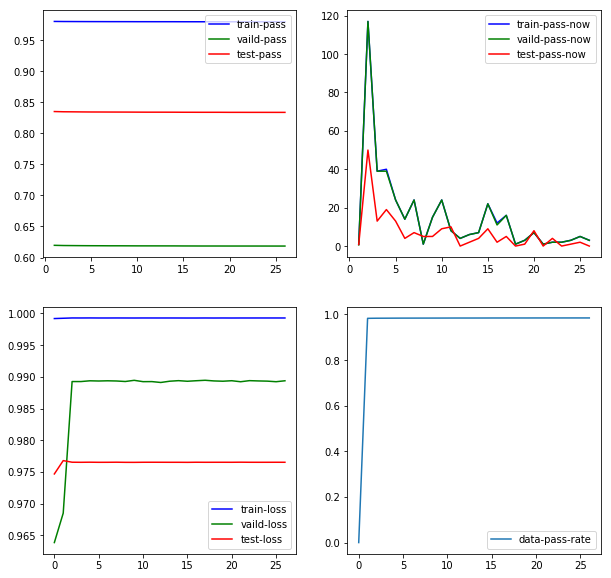

In [73]:
# 0222
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
plt.plot(x,train_loss_lt, label="train-loss", color="blue")
plt.plot(x,vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

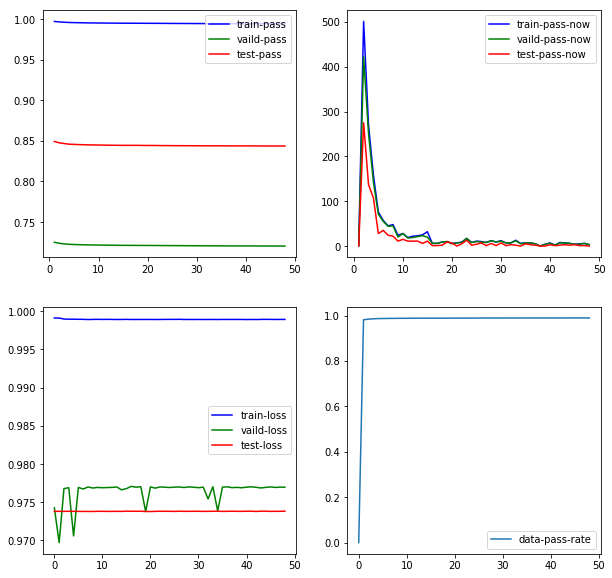

In [89]:
# 0123
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
plt.plot(x,train_loss_lt, label="train-loss", color="blue")
plt.plot(x,vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

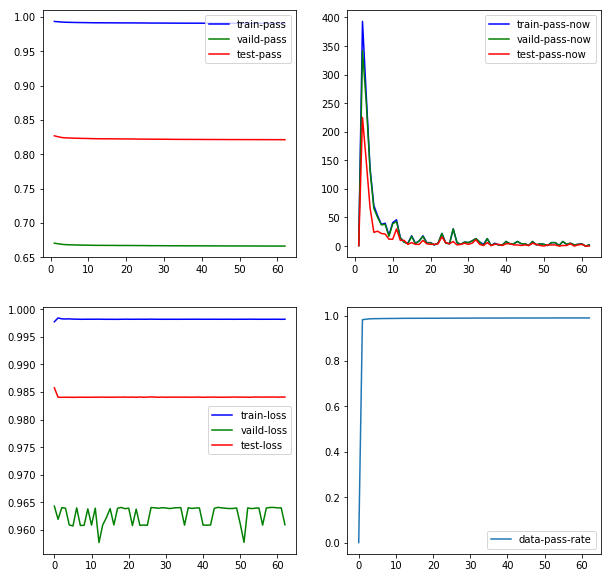

In [18]:
# 0123
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
plt.plot(x,train_loss_lt, label="train-loss", color="blue")
plt.plot(x,vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

In [491]:
import numpy as np

import EnhancedForest_multiclass
import EnhancedForest
import DecomposerForest
import LogUtils
import AlgorithmUtils
import importlib
importlib.reload(DecomposerForest)
importlib.reload(LogUtils)
importlib.reload(EnhancedForest_multiclass)
importlib.reload(EnhancedForest)
importlib.reload(AlgorithmUtils)
np.seterr(divide='ignore', invalid='ignore')
import warnings
warnings.filterwarnings("ignore")

In [492]:
# X_train = X_train.values
# X_test = X_test.values
# y_train = y_train.values
# y_test = y_test.values

In [494]:
decoForest = DecomposerForest.DecomposerForest(X_train, y_train, X_test, y_test, num_class=2, flag="creditcard", isLRStacker=False)
print(decoForest.enhancedDTree)
decoForest.set_parameter(criterion="gini", dropout=0.9, min_samples_leaf=10)
decoForest.fit(n_estimators=50, kfold=3, feval=roc_metrix_mult)


2018-03-24 11:44:43 layer: 1
all data ('roc', 0.8773490138472263)
train loss ('roc', 0.8773490138472263)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('roc', 0.85958543498136053)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('roc', 0.87357612287512498)
pass test loss (0, 0)
pass test loss now (0, 1)
1 [p:0/np:0] 

2018-03-24 11:45:18 layer: 2
all data ('roc', 0.87252924212905247)
[p:3/1:2|n:185121/1:308] 
train loss ('roc', 0.87252924212905247)
pass train loss ('roc', 1.0)
pass train loss now ('roc', 1.0)
vaild loss ('roc', 0.85314464376913224)
pass vaild loss ('roc', 0.75)
pass vaild loss now ('roc', 0.75)
test loss ('roc', 0.87358114795024977)
pass test loss ('mean', 1.0, {1.0})
pass test loss now ('mean', 1.0, {1})
not pass

2018-03-24 11:46:44 layer: 3
all data ('roc', 0.8805829365670873)
[p:0/1:0|n:185124/1:310] 
train loss ('roc', 0.8805829365670873)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('roc', 0.86118751651616954)
pass vail

all data ('roc', 0.87210876548915817)
[p:1/1:0|n:185122/1:309] 
train loss ('roc', 0.87252112586080444)
pass train loss ('roc', 1.0)
pass train loss now ('mean', 0.0, {0})
vaild loss ('roc', 0.86442955550427869)
pass vaild loss ('roc', 1.0)
pass vaild loss now ('mean', 0.0, {0})
test loss ('roc', 0.8763284006975024)
pass test loss ('mean', 0.0, {0.0})
pass test loss now (0, 1)
not pass

2018-03-24 12:13:57 layer: 22
all data ('roc', 0.87858396282129259)
[p:1/1:0|n:185122/1:309] 
train loss ('roc', 0.87897544418677964)
pass train loss ('roc', 1.0)
pass train loss now ('mean', 0.0, {0})
vaild loss ('roc', 0.85797523717830348)
pass vaild loss ('roc', 1.0)
pass vaild loss now ('mean', 0.0, {0})
test loss ('roc', 0.87083389520299703)
pass test loss ('mean', 0.0, {0.0})
pass test loss now (0, 1)
not pass

2018-03-24 12:15:23 layer: 23
all data ('roc', 0.87857855197579393)
[p:0/1:0|n:185123/1:309] 
train loss ('roc', 0.87897003334128088)
pass train loss ('mean', 1.0, {1.0})
pass train loss no

KeyboardInterrupt: 

In [23]:
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.99949840995957184,
 [(0, 0.99944825095552903),
  (1, 0.99949840995957184),
  (2, 0.99944825095552903),
  (3, 0.99946831455714613),
  (4, 0.99945828275633763),
  (5, 0.99945828275633763),
  (6, 0.99947834635795474),
  (7, 0.99946831455714613),
  (8, 0.99946831455714613),
  (9, 0.99945828275633763),
  (10, 0.99945828275633763),
  (11, 0.99944825095552903),
  (12, 0.99944825095552903),
  (13, 0.99945828275633763),
  (14, 0.99944825095552903),
  (15, 0.99944825095552903),
  (16, 0.99944825095552903),
  (17, 0.99944825095552903),
  (18, 0.99946831455714613),
  (19, 0.99945828275633763),
  (20, 0.99944825095552903)])

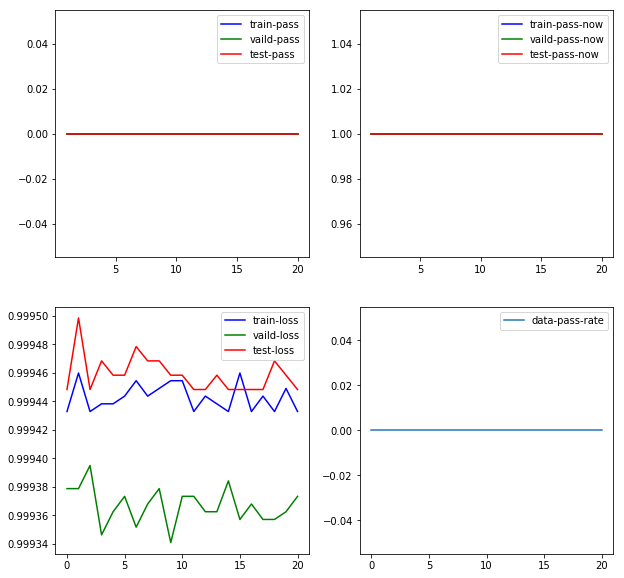

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(decoForest.train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],decoForest.pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],decoForest.pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
plt.plot(x,decoForest.train_loss_lt, label="train-loss", color="blue")
plt.plot(x,decoForest.vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,decoForest.test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,decoForest.pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()